In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def encode_str_label(_dataframe, _columnname):
    from sklearn.preprocessing import LabelEncoder
    _class_lb = LabelEncoder()
    _dataframe['%s' % _columnname] = _class_lb.fit_transform(_dataframe['%s' % _columnname].values)


def encode_str_labels(_dataframe, _labelList):
    from sklearn.preprocessing import LabelEncoder
    for _columnname in _labelList:
        _class_lb = LabelEncoder()
        _dataframe['%s' % _columnname] = _class_lb.fit_transform(_dataframe['%s' % _columnname].values)

In [3]:
train_set = pd.read_csv("train.csv")
test_set = pd.read_csv("test.csv")

<AxesSubplot:xlabel='target', ylabel='Frequency'>

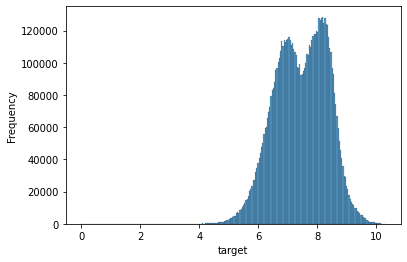

In [4]:
sns.histplot(train_set["target"], stat='frequency')

So dropping sample with target < 4 might be Okay.

<AxesSubplot:xlabel='target', ylabel='Frequency'>

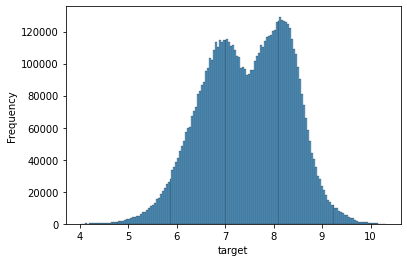

In [5]:
train_set = train_set[train_set["target"] >= 4]
sns.histplot(train_set["target"], stat='frequency')

<AxesSubplot:>

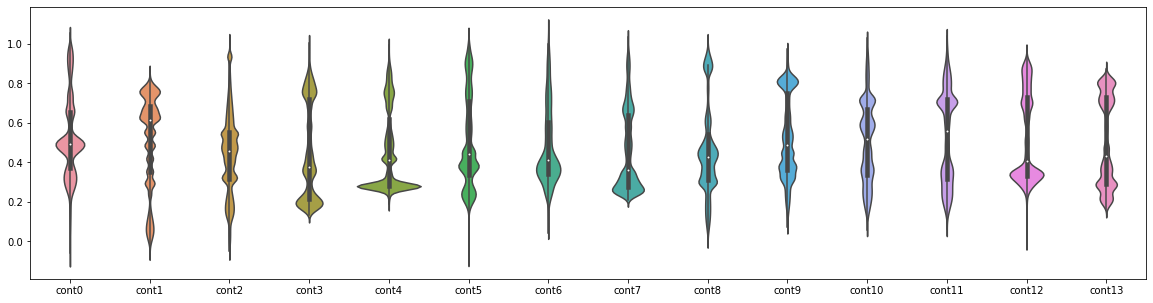

In [6]:
cont_list = train_set.select_dtypes(include='float').columns.tolist()
cont_list = cont_list[:-1]

plt.figure(figsize=(20,5))
sns.violinplot(data=train_set[cont_list])

In [1]:
cat_list = train_set.select_dtypes(include='object').columns.tolist()

i = 0
f, axes = plt.subplots(5, 2, sharex=True, figsize=(12,18))
for row in range(5):
    for col in range(2):
        sns.histplot(y=cat_list[i], data=train_set, ax=axes[row, col], fill=False)
        axes[row, col].set_title(cat_list[i])
        i += 1

NameError: name 'train_set' is not defined

In [8]:
drop_features = ["cat0", "cat2", "cat4", "cat6", "cat7"]
train_set = train_set.drop(labels=drop_features, axis=1)
test_set = test_set.drop(labels=drop_features, axis=1)

So the feature ["cat0", "cat2", "cat4", "cat6"] might not work.

In [9]:
N_train = train_set.shape[0]
N_test = test_set.shape[0]

In [36]:
all_set = pd.concat((train_set.iloc[:, 1:], test_set.iloc[:, 1:]))
all_set

,cat1,cat3,cat5,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,target
0,B,A,D,C,I,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903,6.994023
1,A,A,B,A,F,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464,8.071256
2,A,C,D,C,N,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352,5.760456
3,A,C,D,G,K,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766,7.806457
4,B,A,B,C,F,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743,6.868974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,A,C,D,G,L,0.919265,0.111147,0.199583,0.181354,0.277365,0.963678,0.240482,0.686462,0.915165,0.848878,0.459598,0.590327,0.864873,0.425258,NaN
199996,A,C,D,E,F,0.362875,-0.020197,0.469025,0.336185,0.523174,0.232072,0.363421,0.694092,0.137002,0.319465,0.364527,0.388908,0.664357,0.224215,NaN
199997,A,C,D,C,K,0.463060,0.740421,0.446293,0.411387,0.517103,0.432927,0.811876,0.328398,0.496017,0.538779,0.466338,0.643869,0.749590,0.457702,NaN
199998,B,A,D,C,F,0.708709,0.418490,0.193004,0.862700,0.279153,0.837712,0.680886,0.534439,0.501588,0.809053,0.631704,0.766426,0.937139,0.796304,NaN


In [37]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import VarianceThreshold

numeric_set = train_set.dtypes[train_set.dtypes != 'object'].index
X_train = train_set[numeric_set].iloc[:,1:-1]

poly = PolynomialFeatures(2)
_a = poly.fit_transform(X_train)

a = VarianceThreshold(threshold=0)
a = a.fit_transform(_a)


In [38]:
_feature_name = ["feature%i" % i for i in range(a.shape[1])]
a = pd.DataFrame(a, columns=_feature_name)

In [39]:
a

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature109,feature110,feature111,feature112,feature113,feature114,feature115,feature116,feature117,feature118
0,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,...,0.524780,0.508479,0.635761,0.521510,0.492685,0.616014,0.505311,0.770214,0.631800,0.518260
1,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,...,0.376078,0.454597,0.200336,0.495792,0.549510,0.242163,0.599306,0.106719,0.264108,0.653615
2,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,...,0.069751,0.183700,0.229541,0.218771,0.483806,0.604535,0.576169,0.755391,0.719947,0.686166
3,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,...,0.244302,0.345062,0.400259,0.303860,0.487379,0.565341,0.429184,0.655774,0.497837,0.377938
4,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,...,0.524824,0.494850,0.248816,0.215699,0.466589,0.234606,0.203381,0.117962,0.102262,0.088651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299961,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,...,0.055560,0.090390,0.050731,0.187067,0.147054,0.082534,0.304339,0.046323,0.170810,0.629848
299962,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,...,0.081850,0.092945,0.087812,0.066060,0.105543,0.099714,0.075014,0.094208,0.070871,0.053316
299963,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,...,0.055596,0.074667,0.059015,0.082300,0.100280,0.079258,0.110531,0.062643,0.087360,0.121830
299964,0.599403,0.686054,0.660860,0.187199,0.758642,0.363130,0.324132,0.229017,0.220888,0.515304,...,0.151625,0.095492,0.118334,0.187351,0.060140,0.074525,0.117991,0.092352,0.146216,0.231494


In [20]:
from sklearn.feature_selection import SelectKBest, VarianceThreshold
from sklearn.feature_selection import chi2
a_new = VarianceThreshold(threshold=0)
a_new.fit_transform(a)

array([[0.92319055, 0.68496832, 0.12445359, ..., 0.7702137 , 0.63179984,
        0.51826011],
       [0.43762735, 0.01421302, 0.35743798, ..., 0.10671897, 0.26410808,
        0.65361462],
       [0.73220857, 0.76012204, 0.45464394, ..., 0.75539136, 0.71994733,
        0.68616638],
       ...,
       [0.34285562, 0.61786876, 0.46299065, ..., 0.06264326, 0.08736018,
        0.12182955],
       [0.59940282, 0.68605449, 0.66085978, ..., 0.09235239, 0.14621552,
        0.23149353],
       [0.47545112, 0.03765918, 0.75377192, ..., 0.50818038, 0.32250146,
        0.2046659 ]])

Learning rate set to 0.103531
0:	learn: 0.8845664	total: 14.2ms	remaining: 14.2s
1:	learn: 0.8831334	total: 25.2ms	remaining: 12.6s
2:	learn: 0.8819091	total: 36ms	remaining: 12s
3:	learn: 0.8809128	total: 46.4ms	remaining: 11.6s
4:	learn: 0.8800549	total: 56.8ms	remaining: 11.3s
5:	learn: 0.8792793	total: 66.8ms	remaining: 11.1s
6:	learn: 0.8786918	total: 76.9ms	remaining: 10.9s
7:	learn: 0.8780399	total: 87.6ms	remaining: 10.9s
8:	learn: 0.8774435	total: 98.6ms	remaining: 10.9s
9:	learn: 0.8769801	total: 109ms	remaining: 10.8s
10:	learn: 0.8764510	total: 121ms	remaining: 10.9s
11:	learn: 0.8760387	total: 136ms	remaining: 11.2s
12:	learn: 0.8755897	total: 151ms	remaining: 11.5s
13:	learn: 0.8752178	total: 166ms	remaining: 11.7s
14:	learn: 0.8748415	total: 176ms	remaining: 11.6s
15:	learn: 0.8744303	total: 189ms	remaining: 11.6s
16:	learn: 0.8741396	total: 199ms	remaining: 11.5s
17:	learn: 0.8738598	total: 209ms	remaining: 11.4s
18:	learn: 0.8735477	total: 220ms	remaining: 11.4s
19:	le

161:	learn: 0.8599526	total: 1.97s	remaining: 10.2s
162:	learn: 0.8599127	total: 1.98s	remaining: 10.2s
163:	learn: 0.8598808	total: 2s	remaining: 10.2s
164:	learn: 0.8598376	total: 2.01s	remaining: 10.2s
165:	learn: 0.8597898	total: 2.02s	remaining: 10.2s
166:	learn: 0.8597370	total: 2.04s	remaining: 10.2s
167:	learn: 0.8596754	total: 2.05s	remaining: 10.1s
168:	learn: 0.8596284	total: 2.06s	remaining: 10.1s
169:	learn: 0.8595690	total: 2.07s	remaining: 10.1s
170:	learn: 0.8595308	total: 2.08s	remaining: 10.1s
171:	learn: 0.8594770	total: 2.09s	remaining: 10.1s
172:	learn: 0.8594364	total: 2.1s	remaining: 10s
173:	learn: 0.8593755	total: 2.11s	remaining: 10s
174:	learn: 0.8593205	total: 2.12s	remaining: 10s
175:	learn: 0.8592700	total: 2.13s	remaining: 9.99s
176:	learn: 0.8592240	total: 2.15s	remaining: 9.98s
177:	learn: 0.8591787	total: 2.16s	remaining: 9.96s
178:	learn: 0.8591300	total: 2.17s	remaining: 9.96s
179:	learn: 0.8590622	total: 2.19s	remaining: 9.96s
180:	learn: 0.8590031	

326:	learn: 0.8532320	total: 4.02s	remaining: 8.28s
327:	learn: 0.8531960	total: 4.04s	remaining: 8.27s
328:	learn: 0.8531564	total: 4.05s	remaining: 8.26s
329:	learn: 0.8531147	total: 4.06s	remaining: 8.25s
330:	learn: 0.8530844	total: 4.07s	remaining: 8.23s
331:	learn: 0.8530487	total: 4.08s	remaining: 8.22s
332:	learn: 0.8530167	total: 4.09s	remaining: 8.2s
333:	learn: 0.8529685	total: 4.11s	remaining: 8.19s
334:	learn: 0.8529409	total: 4.12s	remaining: 8.17s
335:	learn: 0.8529049	total: 4.13s	remaining: 8.15s
336:	learn: 0.8528604	total: 4.14s	remaining: 8.14s
337:	learn: 0.8528261	total: 4.15s	remaining: 8.12s
338:	learn: 0.8527851	total: 4.16s	remaining: 8.11s
339:	learn: 0.8527599	total: 4.17s	remaining: 8.1s
340:	learn: 0.8527217	total: 4.19s	remaining: 8.09s
341:	learn: 0.8526803	total: 4.2s	remaining: 8.08s
342:	learn: 0.8526481	total: 4.21s	remaining: 8.07s
343:	learn: 0.8526162	total: 4.23s	remaining: 8.06s
344:	learn: 0.8525822	total: 4.25s	remaining: 8.06s
345:	learn: 0.8

495:	learn: 0.8478005	total: 6.28s	remaining: 6.38s
496:	learn: 0.8477650	total: 6.29s	remaining: 6.37s
497:	learn: 0.8477224	total: 6.31s	remaining: 6.36s
498:	learn: 0.8476930	total: 6.33s	remaining: 6.35s
499:	learn: 0.8476554	total: 6.34s	remaining: 6.34s
500:	learn: 0.8476253	total: 6.35s	remaining: 6.33s
501:	learn: 0.8475967	total: 6.37s	remaining: 6.31s
502:	learn: 0.8475678	total: 6.38s	remaining: 6.3s
503:	learn: 0.8475423	total: 6.39s	remaining: 6.29s
504:	learn: 0.8475145	total: 6.4s	remaining: 6.27s
505:	learn: 0.8474926	total: 6.41s	remaining: 6.26s
506:	learn: 0.8474721	total: 6.42s	remaining: 6.24s
507:	learn: 0.8474461	total: 6.43s	remaining: 6.23s
508:	learn: 0.8474166	total: 6.44s	remaining: 6.21s
509:	learn: 0.8473902	total: 6.45s	remaining: 6.2s
510:	learn: 0.8473603	total: 6.46s	remaining: 6.19s
511:	learn: 0.8473283	total: 6.48s	remaining: 6.17s
512:	learn: 0.8472866	total: 6.49s	remaining: 6.16s
513:	learn: 0.8472650	total: 6.5s	remaining: 6.15s
514:	learn: 0.84

667:	learn: 0.8428784	total: 8.33s	remaining: 4.14s
668:	learn: 0.8428433	total: 8.34s	remaining: 4.13s
669:	learn: 0.8428147	total: 8.36s	remaining: 4.12s
670:	learn: 0.8427911	total: 8.37s	remaining: 4.11s
671:	learn: 0.8427698	total: 8.39s	remaining: 4.09s
672:	learn: 0.8427426	total: 8.4s	remaining: 4.08s
673:	learn: 0.8427084	total: 8.41s	remaining: 4.07s
674:	learn: 0.8426703	total: 8.43s	remaining: 4.06s
675:	learn: 0.8426521	total: 8.44s	remaining: 4.04s
676:	learn: 0.8426226	total: 8.45s	remaining: 4.03s
677:	learn: 0.8425884	total: 8.46s	remaining: 4.02s
678:	learn: 0.8425650	total: 8.47s	remaining: 4s
679:	learn: 0.8425410	total: 8.48s	remaining: 3.99s
680:	learn: 0.8425134	total: 8.49s	remaining: 3.98s
681:	learn: 0.8424927	total: 8.5s	remaining: 3.96s
682:	learn: 0.8424631	total: 8.51s	remaining: 3.95s
683:	learn: 0.8424417	total: 8.53s	remaining: 3.94s
684:	learn: 0.8424122	total: 8.54s	remaining: 3.93s
685:	learn: 0.8423818	total: 8.55s	remaining: 3.92s
686:	learn: 0.842

830:	learn: 0.8385416	total: 10.6s	remaining: 2.15s
831:	learn: 0.8385269	total: 10.6s	remaining: 2.14s
832:	learn: 0.8384977	total: 10.6s	remaining: 2.13s
833:	learn: 0.8384662	total: 10.6s	remaining: 2.11s
834:	learn: 0.8384369	total: 10.6s	remaining: 2.1s
835:	learn: 0.8384088	total: 10.6s	remaining: 2.09s
836:	learn: 0.8383809	total: 10.7s	remaining: 2.08s
837:	learn: 0.8383582	total: 10.7s	remaining: 2.06s
838:	learn: 0.8383400	total: 10.7s	remaining: 2.05s
839:	learn: 0.8383116	total: 10.7s	remaining: 2.04s
840:	learn: 0.8382832	total: 10.7s	remaining: 2.03s
841:	learn: 0.8382563	total: 10.8s	remaining: 2.02s
842:	learn: 0.8382342	total: 10.8s	remaining: 2s
843:	learn: 0.8382149	total: 10.8s	remaining: 1.99s
844:	learn: 0.8381893	total: 10.8s	remaining: 1.98s
845:	learn: 0.8381670	total: 10.8s	remaining: 1.97s
846:	learn: 0.8381422	total: 10.8s	remaining: 1.96s
847:	learn: 0.8381200	total: 10.8s	remaining: 1.94s
848:	learn: 0.8380962	total: 10.9s	remaining: 1.93s
849:	learn: 0.83

990:	learn: 0.8345364	total: 12.8s	remaining: 116ms
991:	learn: 0.8345119	total: 12.8s	remaining: 103ms
992:	learn: 0.8344906	total: 12.8s	remaining: 90.5ms
993:	learn: 0.8344659	total: 12.9s	remaining: 77.6ms
994:	learn: 0.8344436	total: 12.9s	remaining: 64.6ms
995:	learn: 0.8344225	total: 12.9s	remaining: 51.7ms
996:	learn: 0.8343923	total: 12.9s	remaining: 38.8ms
997:	learn: 0.8343692	total: 12.9s	remaining: 25.8ms
998:	learn: 0.8343465	total: 12.9s	remaining: 12.9ms
999:	learn: 0.8343292	total: 12.9s	remaining: 0us
MSE%: 74.2100073849474
MAE%: 72.27573941520421
R2%: 5.640953978235719
RMSE%: 86.14523050346283


Weight,Feature
0.0082 ± 0.0003,feature9
0.0078 ± 0.0004,feature8
0.0073 ± 0.0003,feature118
0.0072 ± 0.0003,feature13
0.0070 ± 0.0001,feature98
0.0059 ± 0.0002,feature1
0.0054 ± 0.0002,feature11
0.0052 ± 0.0003,feature14
0.0049 ± 0.0002,feature0
0.0043 ± 0.0003,feature6


In [11]:
all_set = pd.concat((train_set.iloc[:, 1:], test_set.iloc[:, 1:]))

str_set = all_set.dtypes[all_set.dtypes == 'object'].index
numeric_set = all_set.dtypes[all_set.dtypes != 'object'].index
all_set[numeric_set].apply(
    lambda x: ((x - x.mean()) / x.std())
)
encode_str_labels(all_set, str_set)
all_set = all_set.fillna(0)

In [12]:
train_set = all_set.iloc[:N_train]
test_set = all_set.iloc[N_train:]

In [13]:
X_train = train_set.drop(labels="target", axis=1)
test_set = test_set.drop(labels="target", axis=1)
y_train = train_set["target"]

# train_set

In [14]:
X_train

,cat1,cat3,cat5,cat8,cat9,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13
0,1,0,3,2,8,0.923191,0.684968,0.124454,0.217886,0.281421,0.881122,0.421650,0.741413,0.895799,0.802461,0.724417,0.701915,0.877618,0.719903
1,0,0,1,0,5,0.437627,0.014213,0.357438,0.846127,0.282354,0.440011,0.346230,0.278495,0.593413,0.546056,0.613252,0.741289,0.326679,0.808464
2,0,2,3,2,13,0.732209,0.760122,0.454644,0.812990,0.293756,0.914155,0.369602,0.832564,0.865620,0.825251,0.264104,0.695561,0.869133,0.828352
3,0,2,3,6,10,0.705142,0.771678,0.153735,0.732893,0.769785,0.934138,0.578930,0.407313,0.868099,0.794402,0.494269,0.698125,0.809799,0.614766
4,1,0,1,2,5,0.486063,0.639349,0.496212,0.354186,0.279105,0.382600,0.705940,0.325193,0.440967,0.462146,0.724447,0.683073,0.343457,0.297743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,2,1,4,11,0.260716,0.712438,0.161661,0.442794,0.768447,0.269578,0.258655,0.363598,0.300619,0.340516,0.235711,0.383477,0.215227,0.793630
299996,1,2,1,4,11,0.173302,0.121591,0.592514,0.193711,0.775951,0.197211,0.257024,0.574304,0.227035,0.322583,0.286094,0.324874,0.306933,0.230902
299997,1,2,1,2,12,0.342856,0.617869,0.462991,0.418098,0.297406,0.449482,0.386172,0.476217,0.135947,0.502730,0.235788,0.316671,0.250286,0.349041
299998,1,2,1,4,5,0.599403,0.686054,0.660860,0.187199,0.758642,0.363130,0.324132,0.229017,0.220888,0.515304,0.389391,0.245234,0.303895,0.481138


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, train_size=0.8, random_state=1024)

In [16]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
model.fit(X_train, y_train)

predict_val = model.predict(X_validation)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.103531
0:	learn: 0.8837543	total: 75.8ms	remaining: 1m 15s
1:	learn: 0.8811850	total: 88.5ms	remaining: 44.2s
2:	learn: 0.8790640	total: 99.3ms	remaining: 33s
3:	learn: 0.8771744	total: 115ms	remaining: 28.6s
4:	learn: 0.8755465	total: 130ms	remaining: 25.9s
5:	learn: 0.8741538	total: 143ms	remaining: 23.7s
6:	learn: 0.8728777	total: 154ms	remaining: 21.8s
7:	learn: 0.8718192	total: 165ms	remaining: 20.4s
8:	learn: 0.8708073	total: 176ms	remaining: 19.3s
9:	learn: 0.8698793	total: 186ms	remaining: 18.4s
10:	learn: 0.8691131	total: 197ms	remaining: 17.7s
11:	learn: 0.8683353	total: 207ms	remaining: 17s
12:	learn: 0.8676215	total: 217ms	remaining: 16.5s
13:	learn: 0.8669842	total: 228ms	remaining: 16s
14:	learn: 0.8663626	total: 238ms	remaining: 15.6s
15:	learn: 0.8657224	total: 248ms	remaining: 15.2s
16:	learn: 0.8651986	total: 258ms	remaining: 14.9s
17:	learn: 0.8647262	total: 269ms	remaining: 14.7s
18:	learn: 0.8642452	total: 278ms	remaining: 14.4s
19:	learn: 0.

176:	learn: 0.8455158	total: 2.17s	remaining: 10.1s
177:	learn: 0.8454681	total: 2.18s	remaining: 10.1s
178:	learn: 0.8454051	total: 2.2s	remaining: 10.1s
179:	learn: 0.8453527	total: 2.21s	remaining: 10.1s
180:	learn: 0.8452946	total: 2.23s	remaining: 10.1s
181:	learn: 0.8452385	total: 2.25s	remaining: 10.1s
182:	learn: 0.8451761	total: 2.26s	remaining: 10.1s
183:	learn: 0.8451281	total: 2.28s	remaining: 10.1s
184:	learn: 0.8450707	total: 2.29s	remaining: 10.1s
185:	learn: 0.8450209	total: 2.3s	remaining: 10.1s
186:	learn: 0.8449559	total: 2.31s	remaining: 10.1s
187:	learn: 0.8449084	total: 2.33s	remaining: 10.1s
188:	learn: 0.8448477	total: 2.34s	remaining: 10s
189:	learn: 0.8447807	total: 2.35s	remaining: 10s
190:	learn: 0.8447204	total: 2.36s	remaining: 10s
191:	learn: 0.8446708	total: 2.38s	remaining: 10s
192:	learn: 0.8446111	total: 2.39s	remaining: 10s
193:	learn: 0.8445625	total: 2.4s	remaining: 9.98s
194:	learn: 0.8445067	total: 2.42s	remaining: 9.97s
195:	learn: 0.8444441	tot

346:	learn: 0.8381693	total: 4.2s	remaining: 7.9s
347:	learn: 0.8381306	total: 4.21s	remaining: 7.9s
348:	learn: 0.8381017	total: 4.23s	remaining: 7.89s
349:	learn: 0.8380757	total: 4.24s	remaining: 7.88s
350:	learn: 0.8380301	total: 4.26s	remaining: 7.88s
351:	learn: 0.8379990	total: 4.27s	remaining: 7.86s
352:	learn: 0.8379610	total: 4.28s	remaining: 7.85s
353:	learn: 0.8379219	total: 4.29s	remaining: 7.83s
354:	learn: 0.8378788	total: 4.3s	remaining: 7.82s
355:	learn: 0.8378426	total: 4.31s	remaining: 7.8s
356:	learn: 0.8378211	total: 4.32s	remaining: 7.79s
357:	learn: 0.8377810	total: 4.33s	remaining: 7.77s
358:	learn: 0.8377512	total: 4.34s	remaining: 7.75s
359:	learn: 0.8377233	total: 4.35s	remaining: 7.74s
360:	learn: 0.8376899	total: 4.36s	remaining: 7.72s
361:	learn: 0.8376572	total: 4.37s	remaining: 7.71s
362:	learn: 0.8376293	total: 4.38s	remaining: 7.69s
363:	learn: 0.8375983	total: 4.39s	remaining: 7.67s
364:	learn: 0.8375621	total: 4.4s	remaining: 7.66s
365:	learn: 0.8375

513:	learn: 0.8325683	total: 6.04s	remaining: 5.71s
514:	learn: 0.8325362	total: 6.05s	remaining: 5.7s
515:	learn: 0.8325021	total: 6.07s	remaining: 5.69s
516:	learn: 0.8324719	total: 6.08s	remaining: 5.68s
517:	learn: 0.8324386	total: 6.09s	remaining: 5.66s
518:	learn: 0.8324102	total: 6.09s	remaining: 5.65s
519:	learn: 0.8323872	total: 6.1s	remaining: 5.63s
520:	learn: 0.8323520	total: 6.11s	remaining: 5.62s
521:	learn: 0.8323224	total: 6.12s	remaining: 5.61s
522:	learn: 0.8322831	total: 6.13s	remaining: 5.59s
523:	learn: 0.8322501	total: 6.14s	remaining: 5.58s
524:	learn: 0.8322160	total: 6.15s	remaining: 5.57s
525:	learn: 0.8321857	total: 6.16s	remaining: 5.55s
526:	learn: 0.8321574	total: 6.18s	remaining: 5.55s
527:	learn: 0.8321165	total: 6.2s	remaining: 5.54s
528:	learn: 0.8320884	total: 6.22s	remaining: 5.53s
529:	learn: 0.8320580	total: 6.23s	remaining: 5.53s
530:	learn: 0.8320251	total: 6.24s	remaining: 5.51s
531:	learn: 0.8319994	total: 6.26s	remaining: 5.5s
532:	learn: 0.83

678:	learn: 0.8275564	total: 7.86s	remaining: 3.71s
679:	learn: 0.8275332	total: 7.87s	remaining: 3.7s
680:	learn: 0.8275096	total: 7.88s	remaining: 3.69s
681:	learn: 0.8274811	total: 7.89s	remaining: 3.68s
682:	learn: 0.8274483	total: 7.9s	remaining: 3.67s
683:	learn: 0.8274125	total: 7.92s	remaining: 3.66s
684:	learn: 0.8273908	total: 7.93s	remaining: 3.64s
685:	learn: 0.8273570	total: 7.94s	remaining: 3.63s
686:	learn: 0.8273309	total: 7.95s	remaining: 3.62s
687:	learn: 0.8273009	total: 7.96s	remaining: 3.61s
688:	learn: 0.8272706	total: 7.97s	remaining: 3.6s
689:	learn: 0.8272468	total: 7.98s	remaining: 3.59s
690:	learn: 0.8272213	total: 8s	remaining: 3.58s
691:	learn: 0.8271836	total: 8.01s	remaining: 3.56s
692:	learn: 0.8271434	total: 8.02s	remaining: 3.55s
693:	learn: 0.8271144	total: 8.03s	remaining: 3.54s
694:	learn: 0.8270812	total: 8.04s	remaining: 3.53s
695:	learn: 0.8270476	total: 8.05s	remaining: 3.52s
696:	learn: 0.8270200	total: 8.06s	remaining: 3.5s
697:	learn: 0.82699

851:	learn: 0.8226186	total: 9.86s	remaining: 1.71s
852:	learn: 0.8225873	total: 9.87s	remaining: 1.7s
853:	learn: 0.8225620	total: 9.88s	remaining: 1.69s
854:	learn: 0.8225245	total: 9.9s	remaining: 1.68s
855:	learn: 0.8224997	total: 9.91s	remaining: 1.67s
856:	learn: 0.8224697	total: 9.92s	remaining: 1.66s
857:	learn: 0.8224453	total: 9.93s	remaining: 1.64s
858:	learn: 0.8224088	total: 9.94s	remaining: 1.63s
859:	learn: 0.8223875	total: 9.95s	remaining: 1.62s
860:	learn: 0.8223633	total: 9.96s	remaining: 1.61s
861:	learn: 0.8223358	total: 9.97s	remaining: 1.59s
862:	learn: 0.8222924	total: 9.98s	remaining: 1.58s
863:	learn: 0.8222667	total: 9.99s	remaining: 1.57s
864:	learn: 0.8222361	total: 10s	remaining: 1.56s
865:	learn: 0.8222098	total: 10s	remaining: 1.55s
866:	learn: 0.8221795	total: 10s	remaining: 1.54s
867:	learn: 0.8221563	total: 10s	remaining: 1.52s
868:	learn: 0.8221233	total: 10s	remaining: 1.51s
869:	learn: 0.8220935	total: 10.1s	remaining: 1.5s
870:	learn: 0.8220611	tot

In [17]:
# Model Performance on validation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from math import sqrt
print("MSE%:", mean_squared_error(y_validation, predict_val) * 100)
print("MAE%:", mean_absolute_error(y_validation, predict_val) * 100)
print("R2%:", r2_score(y_validation, predict_val) * 100)
print("RMSE%:", sqrt(mean_squared_error(y_validation, predict_val)) * 100)

MSE%: 71.85650305984794
MAE%: 70.95698506501843
R2%: 8.230931558210475
RMSE%: 84.76821518697201


In [18]:
predict_train = model.predict(X_train)

print("MSE%:", mean_squared_error(y_train, predict_train) * 100)
print("MAE%:", mean_absolute_error(y_train, predict_train) * 100)
print("R2%:", r2_score(y_train, predict_train) * 100)
print("RMSE%:", sqrt(mean_squared_error(y_train, predict_train)) * 100)

MSE%: 67.0003068084092
MAE%: 68.49217725207818
R2%: 14.787035128927217
RMSE%: 81.85371513157433


0:	learn: 0.8838502	total: 15.2ms	remaining: 15.2s
1:	learn: 0.8813520	total: 26.6ms	remaining: 13.3s
2:	learn: 0.8792763	total: 37.6ms	remaining: 12.5s
3:	learn: 0.8774192	total: 48.5ms	remaining: 12.1s
4:	learn: 0.8758159	total: 58.5ms	remaining: 11.6s
5:	learn: 0.8744412	total: 69.1ms	remaining: 11.4s
6:	learn: 0.8731729	total: 79.5ms	remaining: 11.3s
7:	learn: 0.8721577	total: 89.5ms	remaining: 11.1s
8:	learn: 0.8711950	total: 100ms	remaining: 11s
9:	learn: 0.8703103	total: 110ms	remaining: 10.9s
10:	learn: 0.8694200	total: 122ms	remaining: 10.9s
11:	learn: 0.8686506	total: 132ms	remaining: 10.9s
12:	learn: 0.8679851	total: 143ms	remaining: 10.8s
13:	learn: 0.8672759	total: 153ms	remaining: 10.8s
14:	learn: 0.8666843	total: 163ms	remaining: 10.7s
15:	learn: 0.8660708	total: 174ms	remaining: 10.7s
16:	learn: 0.8655346	total: 184ms	remaining: 10.6s
17:	learn: 0.8649536	total: 194ms	remaining: 10.6s
18:	learn: 0.8644547	total: 204ms	remaining: 10.6s
19:	learn: 0.8640352	total: 216ms	r

175:	learn: 0.8458706	total: 2.05s	remaining: 9.61s
176:	learn: 0.8458114	total: 2.07s	remaining: 9.61s
177:	learn: 0.8457452	total: 2.08s	remaining: 9.61s
178:	learn: 0.8456887	total: 2.09s	remaining: 9.6s
179:	learn: 0.8456364	total: 2.1s	remaining: 9.59s
180:	learn: 0.8455765	total: 2.11s	remaining: 9.56s
181:	learn: 0.8455255	total: 2.12s	remaining: 9.55s
182:	learn: 0.8454729	total: 2.13s	remaining: 9.53s
183:	learn: 0.8454085	total: 2.14s	remaining: 9.51s
184:	learn: 0.8453652	total: 2.15s	remaining: 9.49s
185:	learn: 0.8453126	total: 2.16s	remaining: 9.47s
186:	learn: 0.8452683	total: 2.17s	remaining: 9.45s
187:	learn: 0.8452323	total: 2.18s	remaining: 9.43s
188:	learn: 0.8451712	total: 2.19s	remaining: 9.41s
189:	learn: 0.8451210	total: 2.2s	remaining: 9.39s
190:	learn: 0.8450734	total: 2.21s	remaining: 9.38s
191:	learn: 0.8450159	total: 2.22s	remaining: 9.36s
192:	learn: 0.8449523	total: 2.23s	remaining: 9.34s
193:	learn: 0.8449105	total: 2.25s	remaining: 9.33s
194:	learn: 0.8

339:	learn: 0.8388484	total: 3.87s	remaining: 7.51s
340:	learn: 0.8388094	total: 3.89s	remaining: 7.51s
341:	learn: 0.8387788	total: 3.9s	remaining: 7.51s
342:	learn: 0.8387455	total: 3.92s	remaining: 7.51s
343:	learn: 0.8387190	total: 3.94s	remaining: 7.51s
344:	learn: 0.8386839	total: 3.96s	remaining: 7.51s
345:	learn: 0.8386460	total: 3.97s	remaining: 7.51s
346:	learn: 0.8386153	total: 3.99s	remaining: 7.5s
347:	learn: 0.8385720	total: 4s	remaining: 7.5s
348:	learn: 0.8385393	total: 4.02s	remaining: 7.5s
349:	learn: 0.8385122	total: 4.03s	remaining: 7.48s
350:	learn: 0.8384779	total: 4.04s	remaining: 7.47s
351:	learn: 0.8384400	total: 4.05s	remaining: 7.46s
352:	learn: 0.8384032	total: 4.06s	remaining: 7.44s
353:	learn: 0.8383724	total: 4.07s	remaining: 7.43s
354:	learn: 0.8383320	total: 4.09s	remaining: 7.43s
355:	learn: 0.8382968	total: 4.1s	remaining: 7.42s
356:	learn: 0.8382627	total: 4.11s	remaining: 7.4s
357:	learn: 0.8382275	total: 4.12s	remaining: 7.39s
358:	learn: 0.8381979

513:	learn: 0.8331560	total: 5.89s	remaining: 5.57s
514:	learn: 0.8331313	total: 5.91s	remaining: 5.57s
515:	learn: 0.8330990	total: 5.92s	remaining: 5.55s
516:	learn: 0.8330678	total: 5.93s	remaining: 5.54s
517:	learn: 0.8330374	total: 5.95s	remaining: 5.53s
518:	learn: 0.8330026	total: 5.96s	remaining: 5.52s
519:	learn: 0.8329537	total: 5.97s	remaining: 5.51s
520:	learn: 0.8329266	total: 5.98s	remaining: 5.5s
521:	learn: 0.8329009	total: 5.99s	remaining: 5.49s
522:	learn: 0.8328666	total: 6s	remaining: 5.48s
523:	learn: 0.8328405	total: 6.02s	remaining: 5.47s
524:	learn: 0.8328144	total: 6.03s	remaining: 5.45s
525:	learn: 0.8327850	total: 6.04s	remaining: 5.44s
526:	learn: 0.8327584	total: 6.05s	remaining: 5.43s
527:	learn: 0.8327276	total: 6.07s	remaining: 5.42s
528:	learn: 0.8327007	total: 6.08s	remaining: 5.41s
529:	learn: 0.8326701	total: 6.09s	remaining: 5.4s
530:	learn: 0.8326336	total: 6.1s	remaining: 5.39s
531:	learn: 0.8326099	total: 6.11s	remaining: 5.38s
532:	learn: 0.8325

678:	learn: 0.8282667	total: 7.93s	remaining: 3.75s
679:	learn: 0.8282327	total: 7.95s	remaining: 3.74s
680:	learn: 0.8282114	total: 7.96s	remaining: 3.73s
681:	learn: 0.8281834	total: 7.97s	remaining: 3.72s
682:	learn: 0.8281508	total: 7.98s	remaining: 3.7s
683:	learn: 0.8281166	total: 8s	remaining: 3.69s
684:	learn: 0.8280858	total: 8.01s	remaining: 3.68s
685:	learn: 0.8280516	total: 8.02s	remaining: 3.67s
686:	learn: 0.8280242	total: 8.03s	remaining: 3.66s
687:	learn: 0.8279977	total: 8.05s	remaining: 3.65s
688:	learn: 0.8279684	total: 8.06s	remaining: 3.64s
689:	learn: 0.8279345	total: 8.08s	remaining: 3.63s
690:	learn: 0.8278921	total: 8.09s	remaining: 3.62s
691:	learn: 0.8278643	total: 8.1s	remaining: 3.61s
692:	learn: 0.8278304	total: 8.12s	remaining: 3.6s
693:	learn: 0.8278001	total: 8.13s	remaining: 3.58s
694:	learn: 0.8277735	total: 8.14s	remaining: 3.57s
695:	learn: 0.8277360	total: 8.16s	remaining: 3.56s
696:	learn: 0.8277075	total: 8.17s	remaining: 3.55s
697:	learn: 0.8276

848:	learn: 0.8234457	total: 9.96s	remaining: 1.77s
849:	learn: 0.8234134	total: 9.98s	remaining: 1.76s
850:	learn: 0.8233874	total: 10s	remaining: 1.75s
851:	learn: 0.8233608	total: 10s	remaining: 1.74s
852:	learn: 0.8233304	total: 10s	remaining: 1.73s
853:	learn: 0.8232962	total: 10s	remaining: 1.72s
854:	learn: 0.8232631	total: 10s	remaining: 1.7s
855:	learn: 0.8232340	total: 10.1s	remaining: 1.69s
856:	learn: 0.8232074	total: 10.1s	remaining: 1.68s
857:	learn: 0.8231778	total: 10.1s	remaining: 1.67s
858:	learn: 0.8231622	total: 10.1s	remaining: 1.66s
859:	learn: 0.8231386	total: 10.1s	remaining: 1.65s
860:	learn: 0.8231126	total: 10.1s	remaining: 1.63s
861:	learn: 0.8230812	total: 10.1s	remaining: 1.62s
862:	learn: 0.8230451	total: 10.1s	remaining: 1.61s
863:	learn: 0.8230186	total: 10.1s	remaining: 1.6s
864:	learn: 0.8229917	total: 10.2s	remaining: 1.58s
865:	learn: 0.8229661	total: 10.2s	remaining: 1.57s
866:	learn: 0.8229434	total: 10.2s	remaining: 1.56s
867:	learn: 0.8229220	to

21:	learn: 0.8624546	total: 262ms	remaining: 11.7s
22:	learn: 0.8620352	total: 276ms	remaining: 11.7s
23:	learn: 0.8616686	total: 292ms	remaining: 11.9s
24:	learn: 0.8613669	total: 304ms	remaining: 11.9s
25:	learn: 0.8610209	total: 315ms	remaining: 11.8s
26:	learn: 0.8607042	total: 326ms	remaining: 11.8s
27:	learn: 0.8603906	total: 339ms	remaining: 11.8s
28:	learn: 0.8601478	total: 350ms	remaining: 11.7s
29:	learn: 0.8598679	total: 361ms	remaining: 11.7s
30:	learn: 0.8596228	total: 373ms	remaining: 11.7s
31:	learn: 0.8593840	total: 386ms	remaining: 11.7s
32:	learn: 0.8591079	total: 398ms	remaining: 11.7s
33:	learn: 0.8588021	total: 410ms	remaining: 11.6s
34:	learn: 0.8585241	total: 422ms	remaining: 11.6s
35:	learn: 0.8582576	total: 434ms	remaining: 11.6s
36:	learn: 0.8580099	total: 444ms	remaining: 11.6s
37:	learn: 0.8577987	total: 454ms	remaining: 11.5s
38:	learn: 0.8575106	total: 467ms	remaining: 11.5s
39:	learn: 0.8572858	total: 477ms	remaining: 11.5s
40:	learn: 0.8570309	total: 493

182:	learn: 0.8446729	total: 2.09s	remaining: 9.35s
183:	learn: 0.8446230	total: 2.11s	remaining: 9.35s
184:	learn: 0.8445716	total: 2.12s	remaining: 9.35s
185:	learn: 0.8445239	total: 2.13s	remaining: 9.33s
186:	learn: 0.8444555	total: 2.14s	remaining: 9.32s
187:	learn: 0.8444016	total: 2.15s	remaining: 9.3s
188:	learn: 0.8443356	total: 2.17s	remaining: 9.29s
189:	learn: 0.8442865	total: 2.17s	remaining: 9.27s
190:	learn: 0.8442277	total: 2.19s	remaining: 9.26s
191:	learn: 0.8441699	total: 2.2s	remaining: 9.24s
192:	learn: 0.8441285	total: 2.21s	remaining: 9.22s
193:	learn: 0.8440875	total: 2.21s	remaining: 9.21s
194:	learn: 0.8440353	total: 2.23s	remaining: 9.2s
195:	learn: 0.8439824	total: 2.24s	remaining: 9.18s
196:	learn: 0.8439285	total: 2.25s	remaining: 9.17s
197:	learn: 0.8438732	total: 2.26s	remaining: 9.16s
198:	learn: 0.8438214	total: 2.27s	remaining: 9.15s
199:	learn: 0.8437540	total: 2.28s	remaining: 9.14s
200:	learn: 0.8437063	total: 2.3s	remaining: 9.13s
201:	learn: 0.84

343:	learn: 0.8376178	total: 3.92s	remaining: 7.47s
344:	learn: 0.8375832	total: 3.93s	remaining: 7.46s
345:	learn: 0.8375505	total: 3.94s	remaining: 7.46s
346:	learn: 0.8375125	total: 3.96s	remaining: 7.45s
347:	learn: 0.8374786	total: 3.97s	remaining: 7.44s
348:	learn: 0.8374473	total: 3.98s	remaining: 7.42s
349:	learn: 0.8374081	total: 3.99s	remaining: 7.41s
350:	learn: 0.8373595	total: 4s	remaining: 7.4s
351:	learn: 0.8373240	total: 4.01s	remaining: 7.39s
352:	learn: 0.8372911	total: 4.03s	remaining: 7.38s
353:	learn: 0.8372507	total: 4.04s	remaining: 7.37s
354:	learn: 0.8372130	total: 4.05s	remaining: 7.35s
355:	learn: 0.8371708	total: 4.06s	remaining: 7.34s
356:	learn: 0.8371333	total: 4.07s	remaining: 7.33s
357:	learn: 0.8370907	total: 4.08s	remaining: 7.32s
358:	learn: 0.8370591	total: 4.09s	remaining: 7.31s
359:	learn: 0.8370179	total: 4.1s	remaining: 7.29s
360:	learn: 0.8369700	total: 4.11s	remaining: 7.28s
361:	learn: 0.8369395	total: 4.13s	remaining: 7.28s
362:	learn: 0.836

502:	learn: 0.8319974	total: 5.74s	remaining: 5.67s
503:	learn: 0.8319735	total: 5.75s	remaining: 5.66s
504:	learn: 0.8319400	total: 5.77s	remaining: 5.65s
505:	learn: 0.8319066	total: 5.78s	remaining: 5.64s
506:	learn: 0.8318694	total: 5.79s	remaining: 5.63s
507:	learn: 0.8318300	total: 5.8s	remaining: 5.62s
508:	learn: 0.8317949	total: 5.81s	remaining: 5.61s
509:	learn: 0.8317583	total: 5.83s	remaining: 5.6s
510:	learn: 0.8317250	total: 5.84s	remaining: 5.58s
511:	learn: 0.8316918	total: 5.85s	remaining: 5.57s
512:	learn: 0.8316683	total: 5.86s	remaining: 5.56s
513:	learn: 0.8316302	total: 5.87s	remaining: 5.55s
514:	learn: 0.8315969	total: 5.88s	remaining: 5.54s
515:	learn: 0.8315711	total: 5.89s	remaining: 5.52s
516:	learn: 0.8315332	total: 5.9s	remaining: 5.51s
517:	learn: 0.8315009	total: 5.91s	remaining: 5.5s
518:	learn: 0.8314648	total: 5.92s	remaining: 5.49s
519:	learn: 0.8314308	total: 5.93s	remaining: 5.48s
520:	learn: 0.8314029	total: 5.95s	remaining: 5.47s
521:	learn: 0.83

669:	learn: 0.8266985	total: 7.58s	remaining: 3.73s
670:	learn: 0.8266708	total: 7.59s	remaining: 3.72s
671:	learn: 0.8266408	total: 7.6s	remaining: 3.71s
672:	learn: 0.8266135	total: 7.61s	remaining: 3.7s
673:	learn: 0.8265855	total: 7.62s	remaining: 3.69s
674:	learn: 0.8265531	total: 7.63s	remaining: 3.67s
675:	learn: 0.8265204	total: 7.64s	remaining: 3.66s
676:	learn: 0.8264909	total: 7.65s	remaining: 3.65s
677:	learn: 0.8264584	total: 7.66s	remaining: 3.64s
678:	learn: 0.8264263	total: 7.67s	remaining: 3.63s
679:	learn: 0.8263921	total: 7.68s	remaining: 3.62s
680:	learn: 0.8263587	total: 7.7s	remaining: 3.6s
681:	learn: 0.8263296	total: 7.71s	remaining: 3.59s
682:	learn: 0.8262956	total: 7.71s	remaining: 3.58s
683:	learn: 0.8262613	total: 7.72s	remaining: 3.57s
684:	learn: 0.8262351	total: 7.74s	remaining: 3.56s
685:	learn: 0.8262045	total: 7.75s	remaining: 3.54s
686:	learn: 0.8261640	total: 7.76s	remaining: 3.53s
687:	learn: 0.8261413	total: 7.77s	remaining: 3.52s
688:	learn: 0.82

838:	learn: 0.8216479	total: 9.4s	remaining: 1.8s
839:	learn: 0.8216152	total: 9.41s	remaining: 1.79s
840:	learn: 0.8215760	total: 9.43s	remaining: 1.78s
841:	learn: 0.8215428	total: 9.44s	remaining: 1.77s
842:	learn: 0.8215058	total: 9.45s	remaining: 1.76s
843:	learn: 0.8214639	total: 9.46s	remaining: 1.75s
844:	learn: 0.8214261	total: 9.47s	remaining: 1.74s
845:	learn: 0.8213983	total: 9.48s	remaining: 1.73s
846:	learn: 0.8213692	total: 9.49s	remaining: 1.71s
847:	learn: 0.8213391	total: 9.5s	remaining: 1.7s
848:	learn: 0.8213020	total: 9.51s	remaining: 1.69s
849:	learn: 0.8212734	total: 9.52s	remaining: 1.68s
850:	learn: 0.8212578	total: 9.53s	remaining: 1.67s
851:	learn: 0.8212221	total: 9.54s	remaining: 1.66s
852:	learn: 0.8211936	total: 9.55s	remaining: 1.65s
853:	learn: 0.8211595	total: 9.56s	remaining: 1.63s
854:	learn: 0.8211290	total: 9.57s	remaining: 1.62s
855:	learn: 0.8211025	total: 9.58s	remaining: 1.61s
856:	learn: 0.8210814	total: 9.59s	remaining: 1.6s
857:	learn: 0.821

0.11 completed.
0:	learn: 0.8833118	total: 15.1ms	remaining: 15.1s
1:	learn: 0.8804251	total: 26.8ms	remaining: 13.3s
2:	learn: 0.8781136	total: 43.7ms	remaining: 14.5s
3:	learn: 0.8760665	total: 54.9ms	remaining: 13.7s
4:	learn: 0.8743470	total: 66.6ms	remaining: 13.3s
5:	learn: 0.8729136	total: 78.7ms	remaining: 13s
6:	learn: 0.8716063	total: 89.7ms	remaining: 12.7s
7:	learn: 0.8705332	total: 101ms	remaining: 12.5s
8:	learn: 0.8694948	total: 112ms	remaining: 12.3s
9:	learn: 0.8686051	total: 123ms	remaining: 12.2s
10:	learn: 0.8678307	total: 134ms	remaining: 12.1s
11:	learn: 0.8670169	total: 146ms	remaining: 12s
12:	learn: 0.8662753	total: 157ms	remaining: 11.9s
13:	learn: 0.8655557	total: 168ms	remaining: 11.8s
14:	learn: 0.8649707	total: 178ms	remaining: 11.7s
15:	learn: 0.8643916	total: 189ms	remaining: 11.6s
16:	learn: 0.8638031	total: 200ms	remaining: 11.6s
17:	learn: 0.8633541	total: 211ms	remaining: 11.5s
18:	learn: 0.8629108	total: 222ms	remaining: 11.5s
19:	learn: 0.8624376	t

161:	learn: 0.8449789	total: 1.86s	remaining: 9.6s
162:	learn: 0.8449172	total: 1.87s	remaining: 9.62s
163:	learn: 0.8448457	total: 1.88s	remaining: 9.61s
164:	learn: 0.8447808	total: 1.9s	remaining: 9.59s
165:	learn: 0.8447364	total: 1.91s	remaining: 9.57s
166:	learn: 0.8446841	total: 1.92s	remaining: 9.56s
167:	learn: 0.8446255	total: 1.93s	remaining: 9.54s
168:	learn: 0.8445551	total: 1.94s	remaining: 9.53s
169:	learn: 0.8444942	total: 1.95s	remaining: 9.51s
170:	learn: 0.8444432	total: 1.96s	remaining: 9.5s
171:	learn: 0.8443950	total: 1.97s	remaining: 9.48s
172:	learn: 0.8443407	total: 1.98s	remaining: 9.46s
173:	learn: 0.8442842	total: 1.99s	remaining: 9.45s
174:	learn: 0.8442420	total: 2s	remaining: 9.44s
175:	learn: 0.8441763	total: 2.01s	remaining: 9.42s
176:	learn: 0.8441247	total: 2.02s	remaining: 9.4s
177:	learn: 0.8440816	total: 2.03s	remaining: 9.39s
178:	learn: 0.8440060	total: 2.04s	remaining: 9.38s
179:	learn: 0.8439448	total: 2.06s	remaining: 9.38s
180:	learn: 0.84389

326:	learn: 0.8371109	total: 3.68s	remaining: 7.57s
327:	learn: 0.8370759	total: 3.7s	remaining: 7.57s
328:	learn: 0.8370356	total: 3.71s	remaining: 7.57s
329:	learn: 0.8369897	total: 3.72s	remaining: 7.55s
330:	learn: 0.8369419	total: 3.73s	remaining: 7.54s
331:	learn: 0.8368943	total: 3.74s	remaining: 7.53s
332:	learn: 0.8368495	total: 3.75s	remaining: 7.52s
333:	learn: 0.8368057	total: 3.77s	remaining: 7.51s
334:	learn: 0.8367714	total: 3.77s	remaining: 7.5s
335:	learn: 0.8367365	total: 3.79s	remaining: 7.48s
336:	learn: 0.8366985	total: 3.8s	remaining: 7.47s
337:	learn: 0.8366590	total: 3.81s	remaining: 7.45s
338:	learn: 0.8366196	total: 3.82s	remaining: 7.44s
339:	learn: 0.8365806	total: 3.83s	remaining: 7.43s
340:	learn: 0.8365441	total: 3.84s	remaining: 7.42s
341:	learn: 0.8365063	total: 3.85s	remaining: 7.41s
342:	learn: 0.8364742	total: 3.86s	remaining: 7.39s
343:	learn: 0.8364423	total: 3.87s	remaining: 7.38s
344:	learn: 0.8363975	total: 3.88s	remaining: 7.37s
345:	learn: 0.8

489:	learn: 0.8309016	total: 5.5s	remaining: 5.72s
490:	learn: 0.8308544	total: 5.51s	remaining: 5.72s
491:	learn: 0.8308312	total: 5.53s	remaining: 5.71s
492:	learn: 0.8307983	total: 5.54s	remaining: 5.7s
493:	learn: 0.8307609	total: 5.55s	remaining: 5.68s
494:	learn: 0.8307212	total: 5.56s	remaining: 5.67s
495:	learn: 0.8306959	total: 5.57s	remaining: 5.66s
496:	learn: 0.8306597	total: 5.58s	remaining: 5.65s
497:	learn: 0.8306315	total: 5.59s	remaining: 5.64s
498:	learn: 0.8305918	total: 5.6s	remaining: 5.63s
499:	learn: 0.8305564	total: 5.61s	remaining: 5.61s
500:	learn: 0.8305103	total: 5.63s	remaining: 5.6s
501:	learn: 0.8304770	total: 5.64s	remaining: 5.59s
502:	learn: 0.8304400	total: 5.65s	remaining: 5.58s
503:	learn: 0.8304130	total: 5.66s	remaining: 5.57s
504:	learn: 0.8303782	total: 5.67s	remaining: 5.56s
505:	learn: 0.8303437	total: 5.68s	remaining: 5.55s
506:	learn: 0.8302992	total: 5.69s	remaining: 5.54s
507:	learn: 0.8302517	total: 5.71s	remaining: 5.53s
508:	learn: 0.83

651:	learn: 0.8252936	total: 7.34s	remaining: 3.92s
652:	learn: 0.8252597	total: 7.35s	remaining: 3.91s
653:	learn: 0.8252227	total: 7.37s	remaining: 3.9s
654:	learn: 0.8251851	total: 7.38s	remaining: 3.89s
655:	learn: 0.8251499	total: 7.39s	remaining: 3.88s
656:	learn: 0.8251104	total: 7.4s	remaining: 3.86s
657:	learn: 0.8250855	total: 7.41s	remaining: 3.85s
658:	learn: 0.8250497	total: 7.43s	remaining: 3.84s
659:	learn: 0.8250058	total: 7.44s	remaining: 3.83s
660:	learn: 0.8249784	total: 7.45s	remaining: 3.82s
661:	learn: 0.8249472	total: 7.46s	remaining: 3.81s
662:	learn: 0.8249065	total: 7.47s	remaining: 3.8s
663:	learn: 0.8248697	total: 7.48s	remaining: 3.79s
664:	learn: 0.8248315	total: 7.49s	remaining: 3.77s
665:	learn: 0.8247985	total: 7.5s	remaining: 3.76s
666:	learn: 0.8247668	total: 7.52s	remaining: 3.75s
667:	learn: 0.8247383	total: 7.53s	remaining: 3.74s
668:	learn: 0.8247095	total: 7.54s	remaining: 3.73s
669:	learn: 0.8246876	total: 7.55s	remaining: 3.72s
670:	learn: 0.82

819:	learn: 0.8199325	total: 9.36s	remaining: 2.05s
820:	learn: 0.8198974	total: 9.37s	remaining: 2.04s
821:	learn: 0.8198646	total: 9.38s	remaining: 2.03s
822:	learn: 0.8198359	total: 9.39s	remaining: 2.02s
823:	learn: 0.8197976	total: 9.41s	remaining: 2.01s
824:	learn: 0.8197643	total: 9.42s	remaining: 2s
825:	learn: 0.8197255	total: 9.43s	remaining: 1.99s
826:	learn: 0.8196979	total: 9.44s	remaining: 1.98s
827:	learn: 0.8196634	total: 9.45s	remaining: 1.96s
828:	learn: 0.8196272	total: 9.46s	remaining: 1.95s
829:	learn: 0.8196003	total: 9.48s	remaining: 1.94s
830:	learn: 0.8195805	total: 9.49s	remaining: 1.93s
831:	learn: 0.8195462	total: 9.5s	remaining: 1.92s
832:	learn: 0.8195128	total: 9.51s	remaining: 1.91s
833:	learn: 0.8194820	total: 9.52s	remaining: 1.89s
834:	learn: 0.8194540	total: 9.53s	remaining: 1.88s
835:	learn: 0.8194285	total: 9.54s	remaining: 1.87s
836:	learn: 0.8193937	total: 9.55s	remaining: 1.86s
837:	learn: 0.8193663	total: 9.56s	remaining: 1.85s
838:	learn: 0.81

978:	learn: 0.8150388	total: 11.2s	remaining: 240ms
979:	learn: 0.8150088	total: 11.2s	remaining: 229ms
980:	learn: 0.8149755	total: 11.2s	remaining: 217ms
981:	learn: 0.8149445	total: 11.2s	remaining: 206ms
982:	learn: 0.8149193	total: 11.2s	remaining: 194ms
983:	learn: 0.8148921	total: 11.3s	remaining: 183ms
984:	learn: 0.8148530	total: 11.3s	remaining: 172ms
985:	learn: 0.8148257	total: 11.3s	remaining: 160ms
986:	learn: 0.8147946	total: 11.3s	remaining: 149ms
987:	learn: 0.8147635	total: 11.3s	remaining: 137ms
988:	learn: 0.8147371	total: 11.3s	remaining: 126ms
989:	learn: 0.8146920	total: 11.3s	remaining: 114ms
990:	learn: 0.8146545	total: 11.3s	remaining: 103ms
991:	learn: 0.8146197	total: 11.3s	remaining: 91.4ms
992:	learn: 0.8145876	total: 11.3s	remaining: 80ms
993:	learn: 0.8145675	total: 11.4s	remaining: 68.6ms
994:	learn: 0.8145388	total: 11.4s	remaining: 57.1ms
995:	learn: 0.8145168	total: 11.4s	remaining: 45.7ms
996:	learn: 0.8144877	total: 11.4s	remaining: 34.3ms
997:	lea

141:	learn: 0.8454639	total: 1.67s	remaining: 10.1s
142:	learn: 0.8453847	total: 1.68s	remaining: 10.1s
143:	learn: 0.8453341	total: 1.7s	remaining: 10.1s
144:	learn: 0.8452594	total: 1.71s	remaining: 10.1s
145:	learn: 0.8451780	total: 1.72s	remaining: 10.1s
146:	learn: 0.8451273	total: 1.73s	remaining: 10s
147:	learn: 0.8450639	total: 1.74s	remaining: 10s
148:	learn: 0.8450092	total: 1.75s	remaining: 9.99s
149:	learn: 0.8449402	total: 1.76s	remaining: 9.98s
150:	learn: 0.8448720	total: 1.77s	remaining: 9.97s
151:	learn: 0.8448143	total: 1.78s	remaining: 9.95s
152:	learn: 0.8447452	total: 1.79s	remaining: 9.94s
153:	learn: 0.8446645	total: 1.8s	remaining: 9.92s
154:	learn: 0.8445971	total: 1.82s	remaining: 9.9s
155:	learn: 0.8445004	total: 1.83s	remaining: 9.88s
156:	learn: 0.8444403	total: 1.84s	remaining: 9.87s
157:	learn: 0.8443773	total: 1.85s	remaining: 9.85s
158:	learn: 0.8443091	total: 1.86s	remaining: 9.83s
159:	learn: 0.8442594	total: 1.87s	remaining: 9.83s
160:	learn: 0.84420

315:	learn: 0.8364587	total: 3.72s	remaining: 8.05s
316:	learn: 0.8364171	total: 3.73s	remaining: 8.04s
317:	learn: 0.8363717	total: 3.74s	remaining: 8.03s
318:	learn: 0.8363297	total: 3.75s	remaining: 8.02s
319:	learn: 0.8362976	total: 3.77s	remaining: 8s
320:	learn: 0.8362581	total: 3.78s	remaining: 7.99s
321:	learn: 0.8362168	total: 3.79s	remaining: 7.97s
322:	learn: 0.8361616	total: 3.8s	remaining: 7.96s
323:	learn: 0.8361197	total: 3.81s	remaining: 7.95s
324:	learn: 0.8360822	total: 3.82s	remaining: 7.93s
325:	learn: 0.8360375	total: 3.83s	remaining: 7.92s
326:	learn: 0.8359994	total: 3.85s	remaining: 7.92s
327:	learn: 0.8359414	total: 3.86s	remaining: 7.91s
328:	learn: 0.8358993	total: 3.87s	remaining: 7.89s
329:	learn: 0.8358526	total: 3.88s	remaining: 7.88s
330:	learn: 0.8358179	total: 3.89s	remaining: 7.86s
331:	learn: 0.8357871	total: 3.9s	remaining: 7.85s
332:	learn: 0.8357453	total: 3.91s	remaining: 7.84s
333:	learn: 0.8356951	total: 3.93s	remaining: 7.83s
334:	learn: 0.835

475:	learn: 0.8300585	total: 5.56s	remaining: 6.12s
476:	learn: 0.8300174	total: 5.57s	remaining: 6.11s
477:	learn: 0.8299725	total: 5.58s	remaining: 6.1s
478:	learn: 0.8299360	total: 5.6s	remaining: 6.09s
479:	learn: 0.8298945	total: 5.61s	remaining: 6.08s
480:	learn: 0.8298638	total: 5.62s	remaining: 6.06s
481:	learn: 0.8298211	total: 5.63s	remaining: 6.05s
482:	learn: 0.8297723	total: 5.65s	remaining: 6.04s
483:	learn: 0.8297388	total: 5.66s	remaining: 6.03s
484:	learn: 0.8297035	total: 5.67s	remaining: 6.02s
485:	learn: 0.8296569	total: 5.68s	remaining: 6.01s
486:	learn: 0.8296235	total: 5.69s	remaining: 5.99s
487:	learn: 0.8295849	total: 5.7s	remaining: 5.98s
488:	learn: 0.8295561	total: 5.71s	remaining: 5.97s
489:	learn: 0.8295184	total: 5.72s	remaining: 5.96s
490:	learn: 0.8294856	total: 5.74s	remaining: 5.95s
491:	learn: 0.8294512	total: 5.75s	remaining: 5.93s
492:	learn: 0.8294201	total: 5.76s	remaining: 5.92s
493:	learn: 0.8293860	total: 5.77s	remaining: 5.91s
494:	learn: 0.8

646:	learn: 0.8237191	total: 7.57s	remaining: 4.13s
647:	learn: 0.8236812	total: 7.59s	remaining: 4.12s
648:	learn: 0.8236435	total: 7.6s	remaining: 4.11s
649:	learn: 0.8236133	total: 7.61s	remaining: 4.1s
650:	learn: 0.8235757	total: 7.62s	remaining: 4.08s
651:	learn: 0.8235499	total: 7.64s	remaining: 4.08s
652:	learn: 0.8235112	total: 7.65s	remaining: 4.07s
653:	learn: 0.8234753	total: 7.67s	remaining: 4.06s
654:	learn: 0.8234397	total: 7.68s	remaining: 4.04s
655:	learn: 0.8234092	total: 7.69s	remaining: 4.03s
656:	learn: 0.8233728	total: 7.7s	remaining: 4.02s
657:	learn: 0.8233370	total: 7.71s	remaining: 4.01s
658:	learn: 0.8232945	total: 7.72s	remaining: 4s
659:	learn: 0.8232587	total: 7.74s	remaining: 3.98s
660:	learn: 0.8232249	total: 7.75s	remaining: 3.97s
661:	learn: 0.8231809	total: 7.76s	remaining: 3.96s
662:	learn: 0.8231434	total: 7.77s	remaining: 3.95s
663:	learn: 0.8231061	total: 7.79s	remaining: 3.94s
664:	learn: 0.8230679	total: 7.8s	remaining: 3.93s
665:	learn: 0.82304

806:	learn: 0.8181251	total: 9.59s	remaining: 2.29s
807:	learn: 0.8180885	total: 9.61s	remaining: 2.28s
808:	learn: 0.8180594	total: 9.62s	remaining: 2.27s
809:	learn: 0.8180251	total: 9.63s	remaining: 2.26s
810:	learn: 0.8179918	total: 9.65s	remaining: 2.25s
811:	learn: 0.8179563	total: 9.66s	remaining: 2.24s
812:	learn: 0.8179176	total: 9.67s	remaining: 2.23s
813:	learn: 0.8178824	total: 9.68s	remaining: 2.21s
814:	learn: 0.8178529	total: 9.7s	remaining: 2.2s
815:	learn: 0.8178181	total: 9.71s	remaining: 2.19s
816:	learn: 0.8177837	total: 9.72s	remaining: 2.18s
817:	learn: 0.8177491	total: 9.74s	remaining: 2.17s
818:	learn: 0.8177195	total: 9.75s	remaining: 2.15s
819:	learn: 0.8176834	total: 9.76s	remaining: 2.14s
820:	learn: 0.8176554	total: 9.77s	remaining: 2.13s
821:	learn: 0.8176259	total: 9.79s	remaining: 2.12s
822:	learn: 0.8175801	total: 9.8s	remaining: 2.11s
823:	learn: 0.8175429	total: 9.81s	remaining: 2.1s
824:	learn: 0.8175002	total: 9.83s	remaining: 2.08s
825:	learn: 0.81

969:	learn: 0.8127722	total: 11.7s	remaining: 361ms
970:	learn: 0.8127461	total: 11.7s	remaining: 349ms
971:	learn: 0.8127105	total: 11.7s	remaining: 337ms
972:	learn: 0.8126760	total: 11.7s	remaining: 325ms
973:	learn: 0.8126405	total: 11.7s	remaining: 313ms
974:	learn: 0.8126015	total: 11.7s	remaining: 301ms
975:	learn: 0.8125662	total: 11.7s	remaining: 289ms
976:	learn: 0.8125313	total: 11.8s	remaining: 277ms
977:	learn: 0.8124990	total: 11.8s	remaining: 265ms
978:	learn: 0.8124677	total: 11.8s	remaining: 253ms
979:	learn: 0.8124269	total: 11.8s	remaining: 241ms
980:	learn: 0.8123939	total: 11.8s	remaining: 228ms
981:	learn: 0.8123616	total: 11.8s	remaining: 216ms
982:	learn: 0.8123374	total: 11.8s	remaining: 204ms
983:	learn: 0.8123148	total: 11.8s	remaining: 192ms
984:	learn: 0.8122790	total: 11.8s	remaining: 180ms
985:	learn: 0.8122504	total: 11.9s	remaining: 168ms
986:	learn: 0.8122295	total: 11.9s	remaining: 156ms
987:	learn: 0.8121984	total: 11.9s	remaining: 144ms
988:	learn: 

135:	learn: 0.8451874	total: 1.68s	remaining: 10.7s
136:	learn: 0.8451103	total: 1.69s	remaining: 10.7s
137:	learn: 0.8450386	total: 1.71s	remaining: 10.7s
138:	learn: 0.8449719	total: 1.72s	remaining: 10.6s
139:	learn: 0.8449020	total: 1.73s	remaining: 10.6s
140:	learn: 0.8448475	total: 1.74s	remaining: 10.6s
141:	learn: 0.8447731	total: 1.75s	remaining: 10.6s
142:	learn: 0.8446988	total: 1.76s	remaining: 10.5s
143:	learn: 0.8446278	total: 1.77s	remaining: 10.5s
144:	learn: 0.8445373	total: 1.78s	remaining: 10.5s
145:	learn: 0.8444706	total: 1.79s	remaining: 10.5s
146:	learn: 0.8443964	total: 1.8s	remaining: 10.5s
147:	learn: 0.8443312	total: 1.81s	remaining: 10.4s
148:	learn: 0.8442632	total: 1.82s	remaining: 10.4s
149:	learn: 0.8441566	total: 1.84s	remaining: 10.4s
150:	learn: 0.8440939	total: 1.85s	remaining: 10.4s
151:	learn: 0.8440519	total: 1.86s	remaining: 10.4s
152:	learn: 0.8439839	total: 1.87s	remaining: 10.3s
153:	learn: 0.8439147	total: 1.88s	remaining: 10.3s
154:	learn: 0

295:	learn: 0.8364193	total: 3.51s	remaining: 8.35s
296:	learn: 0.8363829	total: 3.52s	remaining: 8.34s
297:	learn: 0.8363399	total: 3.54s	remaining: 8.33s
298:	learn: 0.8363024	total: 3.55s	remaining: 8.32s
299:	learn: 0.8362451	total: 3.56s	remaining: 8.3s
300:	learn: 0.8362162	total: 3.57s	remaining: 8.29s
301:	learn: 0.8361620	total: 3.58s	remaining: 8.28s
302:	learn: 0.8361006	total: 3.59s	remaining: 8.26s
303:	learn: 0.8360551	total: 3.6s	remaining: 8.25s
304:	learn: 0.8360012	total: 3.61s	remaining: 8.23s
305:	learn: 0.8359542	total: 3.62s	remaining: 8.22s
306:	learn: 0.8359174	total: 3.63s	remaining: 8.21s
307:	learn: 0.8358710	total: 3.65s	remaining: 8.19s
308:	learn: 0.8358269	total: 3.66s	remaining: 8.18s
309:	learn: 0.8357889	total: 3.67s	remaining: 8.16s
310:	learn: 0.8357346	total: 3.68s	remaining: 8.15s
311:	learn: 0.8356920	total: 3.69s	remaining: 8.14s
312:	learn: 0.8356397	total: 3.7s	remaining: 8.12s
313:	learn: 0.8355983	total: 3.71s	remaining: 8.11s
314:	learn: 0.8

454:	learn: 0.8295205	total: 5.36s	remaining: 6.42s
455:	learn: 0.8294922	total: 5.37s	remaining: 6.41s
456:	learn: 0.8294516	total: 5.39s	remaining: 6.4s
457:	learn: 0.8293967	total: 5.4s	remaining: 6.39s
458:	learn: 0.8293596	total: 5.41s	remaining: 6.38s
459:	learn: 0.8293155	total: 5.42s	remaining: 6.36s
460:	learn: 0.8292745	total: 5.43s	remaining: 6.35s
461:	learn: 0.8292208	total: 5.44s	remaining: 6.34s
462:	learn: 0.8291742	total: 5.45s	remaining: 6.33s
463:	learn: 0.8291381	total: 5.46s	remaining: 6.31s
464:	learn: 0.8290867	total: 5.47s	remaining: 6.3s
465:	learn: 0.8290534	total: 5.49s	remaining: 6.29s
466:	learn: 0.8290159	total: 5.5s	remaining: 6.28s
467:	learn: 0.8289743	total: 5.51s	remaining: 6.27s
468:	learn: 0.8289344	total: 5.52s	remaining: 6.25s
469:	learn: 0.8288945	total: 5.53s	remaining: 6.24s
470:	learn: 0.8288534	total: 5.54s	remaining: 6.23s
471:	learn: 0.8288020	total: 5.56s	remaining: 6.22s
472:	learn: 0.8287590	total: 5.58s	remaining: 6.21s
473:	learn: 0.82

613:	learn: 0.8233154	total: 7.23s	remaining: 4.54s
614:	learn: 0.8232810	total: 7.24s	remaining: 4.53s
615:	learn: 0.8232405	total: 7.25s	remaining: 4.52s
616:	learn: 0.8232136	total: 7.27s	remaining: 4.51s
617:	learn: 0.8231829	total: 7.28s	remaining: 4.5s
618:	learn: 0.8231501	total: 7.29s	remaining: 4.49s
619:	learn: 0.8231252	total: 7.3s	remaining: 4.47s
620:	learn: 0.8230933	total: 7.31s	remaining: 4.46s
621:	learn: 0.8230485	total: 7.32s	remaining: 4.45s
622:	learn: 0.8230139	total: 7.33s	remaining: 4.44s
623:	learn: 0.8229733	total: 7.34s	remaining: 4.43s
624:	learn: 0.8229377	total: 7.36s	remaining: 4.41s
625:	learn: 0.8229121	total: 7.37s	remaining: 4.4s
626:	learn: 0.8228757	total: 7.38s	remaining: 4.39s
627:	learn: 0.8228466	total: 7.39s	remaining: 4.38s
628:	learn: 0.8228027	total: 7.41s	remaining: 4.37s
629:	learn: 0.8227622	total: 7.42s	remaining: 4.36s
630:	learn: 0.8227220	total: 7.43s	remaining: 4.35s
631:	learn: 0.8226953	total: 7.45s	remaining: 4.34s
632:	learn: 0.8

781:	learn: 0.8172421	total: 9.29s	remaining: 2.59s
782:	learn: 0.8172059	total: 9.31s	remaining: 2.58s
783:	learn: 0.8171733	total: 9.32s	remaining: 2.57s
784:	learn: 0.8171309	total: 9.33s	remaining: 2.56s
785:	learn: 0.8170906	total: 9.34s	remaining: 2.54s
786:	learn: 0.8170606	total: 9.35s	remaining: 2.53s
787:	learn: 0.8170213	total: 9.36s	remaining: 2.52s
788:	learn: 0.8169843	total: 9.38s	remaining: 2.51s
789:	learn: 0.8169465	total: 9.39s	remaining: 2.5s
790:	learn: 0.8169089	total: 9.4s	remaining: 2.48s
791:	learn: 0.8168732	total: 9.41s	remaining: 2.47s
792:	learn: 0.8168433	total: 9.42s	remaining: 2.46s
793:	learn: 0.8167977	total: 9.43s	remaining: 2.45s
794:	learn: 0.8167639	total: 9.44s	remaining: 2.43s
795:	learn: 0.8167297	total: 9.45s	remaining: 2.42s
796:	learn: 0.8166950	total: 9.46s	remaining: 2.41s
797:	learn: 0.8166583	total: 9.48s	remaining: 2.4s
798:	learn: 0.8166254	total: 9.49s	remaining: 2.39s
799:	learn: 0.8165771	total: 9.5s	remaining: 2.38s
800:	learn: 0.81

950:	learn: 0.8113391	total: 11.3s	remaining: 583ms
951:	learn: 0.8112970	total: 11.3s	remaining: 572ms
952:	learn: 0.8112569	total: 11.3s	remaining: 560ms
953:	learn: 0.8112189	total: 11.4s	remaining: 548ms
954:	learn: 0.8111823	total: 11.4s	remaining: 536ms
955:	learn: 0.8111564	total: 11.4s	remaining: 524ms
956:	learn: 0.8111131	total: 11.4s	remaining: 512ms
957:	learn: 0.8110889	total: 11.4s	remaining: 500ms
958:	learn: 0.8110530	total: 11.4s	remaining: 488ms
959:	learn: 0.8110288	total: 11.4s	remaining: 476ms
960:	learn: 0.8109885	total: 11.4s	remaining: 464ms
961:	learn: 0.8109535	total: 11.4s	remaining: 452ms
962:	learn: 0.8109141	total: 11.5s	remaining: 440ms
963:	learn: 0.8108762	total: 11.5s	remaining: 428ms
964:	learn: 0.8108341	total: 11.5s	remaining: 416ms
965:	learn: 0.8107990	total: 11.5s	remaining: 405ms
966:	learn: 0.8107649	total: 11.5s	remaining: 393ms
967:	learn: 0.8107267	total: 11.5s	remaining: 381ms
968:	learn: 0.8106849	total: 11.5s	remaining: 369ms
969:	learn: 

121:	learn: 0.8455787	total: 1.45s	remaining: 10.5s
122:	learn: 0.8454882	total: 1.47s	remaining: 10.5s
123:	learn: 0.8453944	total: 1.48s	remaining: 10.5s
124:	learn: 0.8453141	total: 1.49s	remaining: 10.4s
125:	learn: 0.8452264	total: 1.5s	remaining: 10.4s
126:	learn: 0.8451349	total: 1.51s	remaining: 10.4s
127:	learn: 0.8450624	total: 1.53s	remaining: 10.4s
128:	learn: 0.8449849	total: 1.54s	remaining: 10.4s
129:	learn: 0.8449029	total: 1.55s	remaining: 10.4s
130:	learn: 0.8448379	total: 1.56s	remaining: 10.4s
131:	learn: 0.8447726	total: 1.57s	remaining: 10.3s
132:	learn: 0.8446913	total: 1.59s	remaining: 10.3s
133:	learn: 0.8445977	total: 1.6s	remaining: 10.3s
134:	learn: 0.8445281	total: 1.61s	remaining: 10.3s
135:	learn: 0.8444474	total: 1.62s	remaining: 10.3s
136:	learn: 0.8443700	total: 1.63s	remaining: 10.3s
137:	learn: 0.8442991	total: 1.64s	remaining: 10.3s
138:	learn: 0.8442215	total: 1.65s	remaining: 10.2s
139:	learn: 0.8441477	total: 1.67s	remaining: 10.2s
140:	learn: 0.

295:	learn: 0.8354027	total: 3.47s	remaining: 8.26s
296:	learn: 0.8353527	total: 3.49s	remaining: 8.26s
297:	learn: 0.8353081	total: 3.5s	remaining: 8.26s
298:	learn: 0.8352575	total: 3.52s	remaining: 8.25s
299:	learn: 0.8352074	total: 3.53s	remaining: 8.24s
300:	learn: 0.8351562	total: 3.54s	remaining: 8.23s
301:	learn: 0.8351053	total: 3.55s	remaining: 8.21s
302:	learn: 0.8350596	total: 3.56s	remaining: 8.2s
303:	learn: 0.8350298	total: 3.57s	remaining: 8.18s
304:	learn: 0.8349812	total: 3.58s	remaining: 8.17s
305:	learn: 0.8349228	total: 3.6s	remaining: 8.16s
306:	learn: 0.8348715	total: 3.61s	remaining: 8.14s
307:	learn: 0.8348327	total: 3.62s	remaining: 8.13s
308:	learn: 0.8347897	total: 3.63s	remaining: 8.11s
309:	learn: 0.8347420	total: 3.64s	remaining: 8.1s
310:	learn: 0.8346869	total: 3.65s	remaining: 8.08s
311:	learn: 0.8346507	total: 3.66s	remaining: 8.07s
312:	learn: 0.8346052	total: 3.67s	remaining: 8.05s
313:	learn: 0.8345582	total: 3.69s	remaining: 8.05s
314:	learn: 0.83

469:	learn: 0.8277040	total: 5.51s	remaining: 6.21s
470:	learn: 0.8276620	total: 5.52s	remaining: 6.2s
471:	learn: 0.8276229	total: 5.53s	remaining: 6.19s
472:	learn: 0.8275840	total: 5.55s	remaining: 6.18s
473:	learn: 0.8275526	total: 5.56s	remaining: 6.17s
474:	learn: 0.8275138	total: 5.57s	remaining: 6.15s
475:	learn: 0.8274561	total: 5.58s	remaining: 6.14s
476:	learn: 0.8274236	total: 5.59s	remaining: 6.13s
477:	learn: 0.8273912	total: 5.6s	remaining: 6.12s
478:	learn: 0.8273482	total: 5.61s	remaining: 6.11s
479:	learn: 0.8273100	total: 5.63s	remaining: 6.09s
480:	learn: 0.8272638	total: 5.64s	remaining: 6.09s
481:	learn: 0.8272208	total: 5.66s	remaining: 6.08s
482:	learn: 0.8271691	total: 5.67s	remaining: 6.07s
483:	learn: 0.8271261	total: 5.68s	remaining: 6.05s
484:	learn: 0.8270935	total: 5.69s	remaining: 6.04s
485:	learn: 0.8270542	total: 5.7s	remaining: 6.03s
486:	learn: 0.8269943	total: 5.72s	remaining: 6.02s
487:	learn: 0.8269549	total: 5.73s	remaining: 6.01s
488:	learn: 0.8

637:	learn: 0.8209025	total: 7.56s	remaining: 4.29s
638:	learn: 0.8208702	total: 7.57s	remaining: 4.28s
639:	learn: 0.8208241	total: 7.59s	remaining: 4.27s
640:	learn: 0.8207854	total: 7.6s	remaining: 4.26s
641:	learn: 0.8207347	total: 7.61s	remaining: 4.24s
642:	learn: 0.8206971	total: 7.62s	remaining: 4.23s
643:	learn: 0.8206630	total: 7.63s	remaining: 4.22s
644:	learn: 0.8206218	total: 7.64s	remaining: 4.21s
645:	learn: 0.8205766	total: 7.66s	remaining: 4.2s
646:	learn: 0.8205347	total: 7.67s	remaining: 4.18s
647:	learn: 0.8204781	total: 7.68s	remaining: 4.17s
648:	learn: 0.8204464	total: 7.69s	remaining: 4.16s
649:	learn: 0.8204157	total: 7.7s	remaining: 4.15s
650:	learn: 0.8203867	total: 7.71s	remaining: 4.13s
651:	learn: 0.8203404	total: 7.72s	remaining: 4.12s
652:	learn: 0.8203018	total: 7.74s	remaining: 4.11s
653:	learn: 0.8202670	total: 7.75s	remaining: 4.1s
654:	learn: 0.8202418	total: 7.76s	remaining: 4.09s
655:	learn: 0.8201962	total: 7.78s	remaining: 4.08s
656:	learn: 0.82

808:	learn: 0.8143541	total: 9.81s	remaining: 2.32s
809:	learn: 0.8143218	total: 9.83s	remaining: 2.31s
810:	learn: 0.8142894	total: 9.85s	remaining: 2.29s
811:	learn: 0.8142557	total: 9.86s	remaining: 2.28s
812:	learn: 0.8142177	total: 9.88s	remaining: 2.27s
813:	learn: 0.8141876	total: 9.89s	remaining: 2.26s
814:	learn: 0.8141580	total: 9.9s	remaining: 2.25s
815:	learn: 0.8141279	total: 9.92s	remaining: 2.24s
816:	learn: 0.8140952	total: 9.93s	remaining: 2.22s
817:	learn: 0.8140598	total: 9.94s	remaining: 2.21s
818:	learn: 0.8140170	total: 9.95s	remaining: 2.2s
819:	learn: 0.8139780	total: 9.97s	remaining: 2.19s
820:	learn: 0.8139435	total: 9.98s	remaining: 2.18s
821:	learn: 0.8139046	total: 9.99s	remaining: 2.16s
822:	learn: 0.8138677	total: 10s	remaining: 2.15s
823:	learn: 0.8138322	total: 10s	remaining: 2.14s
824:	learn: 0.8137965	total: 10s	remaining: 2.13s
825:	learn: 0.8137593	total: 10s	remaining: 2.12s
826:	learn: 0.8137157	total: 10.1s	remaining: 2.1s
827:	learn: 0.8136734	t

978:	learn: 0.8081785	total: 11.9s	remaining: 254ms
979:	learn: 0.8081463	total: 11.9s	remaining: 242ms
980:	learn: 0.8081110	total: 11.9s	remaining: 230ms
981:	learn: 0.8080922	total: 11.9s	remaining: 218ms
982:	learn: 0.8080632	total: 11.9s	remaining: 206ms
983:	learn: 0.8080249	total: 11.9s	remaining: 194ms
984:	learn: 0.8079965	total: 11.9s	remaining: 182ms
985:	learn: 0.8079607	total: 11.9s	remaining: 170ms
986:	learn: 0.8079159	total: 12s	remaining: 157ms
987:	learn: 0.8078697	total: 12s	remaining: 145ms
988:	learn: 0.8078221	total: 12s	remaining: 133ms
989:	learn: 0.8077780	total: 12s	remaining: 121ms
990:	learn: 0.8077407	total: 12s	remaining: 109ms
991:	learn: 0.8077004	total: 12s	remaining: 96.8ms
992:	learn: 0.8076593	total: 12s	remaining: 84.7ms
993:	learn: 0.8076340	total: 12s	remaining: 72.6ms
994:	learn: 0.8075999	total: 12s	remaining: 60.5ms
995:	learn: 0.8075706	total: 12s	remaining: 48.4ms
996:	learn: 0.8075424	total: 12.1s	remaining: 36.3ms
997:	learn: 0.8075158	tota

140:	learn: 0.8435089	total: 1.65s	remaining: 10.1s
141:	learn: 0.8434343	total: 1.67s	remaining: 10.1s
142:	learn: 0.8433618	total: 1.69s	remaining: 10.1s
143:	learn: 0.8432979	total: 1.7s	remaining: 10.1s
144:	learn: 0.8432276	total: 1.72s	remaining: 10.1s
145:	learn: 0.8431522	total: 1.74s	remaining: 10.2s
146:	learn: 0.8430831	total: 1.75s	remaining: 10.2s
147:	learn: 0.8430071	total: 1.77s	remaining: 10.2s
148:	learn: 0.8429388	total: 1.78s	remaining: 10.2s
149:	learn: 0.8428779	total: 1.8s	remaining: 10.2s
150:	learn: 0.8428160	total: 1.81s	remaining: 10.2s
151:	learn: 0.8427464	total: 1.83s	remaining: 10.2s
152:	learn: 0.8426875	total: 1.84s	remaining: 10.2s
153:	learn: 0.8426218	total: 1.86s	remaining: 10.2s
154:	learn: 0.8425686	total: 1.88s	remaining: 10.2s
155:	learn: 0.8424914	total: 1.89s	remaining: 10.2s
156:	learn: 0.8424321	total: 1.9s	remaining: 10.2s
157:	learn: 0.8423676	total: 1.92s	remaining: 10.2s
158:	learn: 0.8422886	total: 1.93s	remaining: 10.2s
159:	learn: 0.8

308:	learn: 0.8338912	total: 3.69s	remaining: 8.26s
309:	learn: 0.8338407	total: 3.71s	remaining: 8.26s
310:	learn: 0.8337960	total: 3.72s	remaining: 8.24s
311:	learn: 0.8337457	total: 3.73s	remaining: 8.23s
312:	learn: 0.8336944	total: 3.75s	remaining: 8.23s
313:	learn: 0.8336470	total: 3.76s	remaining: 8.22s
314:	learn: 0.8335978	total: 3.77s	remaining: 8.2s
315:	learn: 0.8335472	total: 3.78s	remaining: 8.19s
316:	learn: 0.8334875	total: 3.79s	remaining: 8.18s
317:	learn: 0.8334419	total: 3.81s	remaining: 8.16s
318:	learn: 0.8333840	total: 3.82s	remaining: 8.15s
319:	learn: 0.8333269	total: 3.83s	remaining: 8.14s
320:	learn: 0.8332682	total: 3.85s	remaining: 8.14s
321:	learn: 0.8332257	total: 3.86s	remaining: 8.12s
322:	learn: 0.8331740	total: 3.87s	remaining: 8.12s
323:	learn: 0.8331166	total: 3.89s	remaining: 8.11s
324:	learn: 0.8330597	total: 3.9s	remaining: 8.11s
325:	learn: 0.8330161	total: 3.92s	remaining: 8.1s
326:	learn: 0.8329650	total: 3.93s	remaining: 8.09s
327:	learn: 0.8

476:	learn: 0.8260441	total: 5.73s	remaining: 6.28s
477:	learn: 0.8259802	total: 5.74s	remaining: 6.27s
478:	learn: 0.8259279	total: 5.76s	remaining: 6.26s
479:	learn: 0.8258895	total: 5.77s	remaining: 6.25s
480:	learn: 0.8258580	total: 5.78s	remaining: 6.24s
481:	learn: 0.8258076	total: 5.79s	remaining: 6.23s
482:	learn: 0.8257500	total: 5.81s	remaining: 6.21s
483:	learn: 0.8257267	total: 5.82s	remaining: 6.2s
484:	learn: 0.8256845	total: 5.83s	remaining: 6.19s
485:	learn: 0.8256427	total: 5.84s	remaining: 6.17s
486:	learn: 0.8255994	total: 5.85s	remaining: 6.16s
487:	learn: 0.8255620	total: 5.86s	remaining: 6.15s
488:	learn: 0.8255159	total: 5.87s	remaining: 6.14s
489:	learn: 0.8254680	total: 5.88s	remaining: 6.12s
490:	learn: 0.8254233	total: 5.89s	remaining: 6.11s
491:	learn: 0.8253810	total: 5.9s	remaining: 6.1s
492:	learn: 0.8253583	total: 5.91s	remaining: 6.08s
493:	learn: 0.8252957	total: 5.93s	remaining: 6.07s
494:	learn: 0.8252527	total: 5.94s	remaining: 6.06s
495:	learn: 0.8

645:	learn: 0.8188696	total: 7.75s	remaining: 4.24s
646:	learn: 0.8188418	total: 7.76s	remaining: 4.24s
647:	learn: 0.8188106	total: 7.78s	remaining: 4.22s
648:	learn: 0.8187713	total: 7.79s	remaining: 4.21s
649:	learn: 0.8187233	total: 7.8s	remaining: 4.2s
650:	learn: 0.8186873	total: 7.81s	remaining: 4.19s
651:	learn: 0.8186533	total: 7.83s	remaining: 4.18s
652:	learn: 0.8186128	total: 7.84s	remaining: 4.17s
653:	learn: 0.8185677	total: 7.85s	remaining: 4.15s
654:	learn: 0.8185252	total: 7.86s	remaining: 4.14s
655:	learn: 0.8184793	total: 7.87s	remaining: 4.13s
656:	learn: 0.8184342	total: 7.88s	remaining: 4.12s
657:	learn: 0.8183993	total: 7.89s	remaining: 4.1s
658:	learn: 0.8183538	total: 7.91s	remaining: 4.09s
659:	learn: 0.8183118	total: 7.92s	remaining: 4.08s
660:	learn: 0.8182642	total: 7.93s	remaining: 4.07s
661:	learn: 0.8182316	total: 7.94s	remaining: 4.05s
662:	learn: 0.8181850	total: 7.96s	remaining: 4.04s
663:	learn: 0.8181385	total: 7.97s	remaining: 4.03s
664:	learn: 0.8

812:	learn: 0.8122738	total: 9.79s	remaining: 2.25s
813:	learn: 0.8122372	total: 9.81s	remaining: 2.24s
814:	learn: 0.8122016	total: 9.82s	remaining: 2.23s
815:	learn: 0.8121725	total: 9.83s	remaining: 2.22s
816:	learn: 0.8121279	total: 9.84s	remaining: 2.21s
817:	learn: 0.8120915	total: 9.86s	remaining: 2.19s
818:	learn: 0.8120582	total: 9.87s	remaining: 2.18s
819:	learn: 0.8120164	total: 9.88s	remaining: 2.17s
820:	learn: 0.8119673	total: 9.89s	remaining: 2.16s
821:	learn: 0.8119059	total: 9.9s	remaining: 2.14s
822:	learn: 0.8118804	total: 9.91s	remaining: 2.13s
823:	learn: 0.8118442	total: 9.93s	remaining: 2.12s
824:	learn: 0.8118018	total: 9.94s	remaining: 2.11s
825:	learn: 0.8117688	total: 9.95s	remaining: 2.1s
826:	learn: 0.8117276	total: 9.96s	remaining: 2.08s
827:	learn: 0.8116856	total: 9.97s	remaining: 2.07s
828:	learn: 0.8116369	total: 9.98s	remaining: 2.06s
829:	learn: 0.8115970	total: 9.99s	remaining: 2.05s
830:	learn: 0.8115378	total: 10s	remaining: 2.04s
831:	learn: 0.81

987:	learn: 0.8056053	total: 11.8s	remaining: 144ms
988:	learn: 0.8055629	total: 11.8s	remaining: 132ms
989:	learn: 0.8055269	total: 11.8s	remaining: 120ms
990:	learn: 0.8054846	total: 11.9s	remaining: 108ms
991:	learn: 0.8054435	total: 11.9s	remaining: 95.7ms
992:	learn: 0.8054118	total: 11.9s	remaining: 83.7ms
993:	learn: 0.8053866	total: 11.9s	remaining: 71.7ms
994:	learn: 0.8053526	total: 11.9s	remaining: 59.8ms
995:	learn: 0.8053122	total: 11.9s	remaining: 47.8ms
996:	learn: 0.8052793	total: 11.9s	remaining: 35.9ms
997:	learn: 0.8052414	total: 11.9s	remaining: 23.9ms
998:	learn: 0.8052087	total: 11.9s	remaining: 11.9ms
999:	learn: 0.8051829	total: 11.9s	remaining: 0us
0.16 completed.
0:	learn: 0.8820172	total: 16.4ms	remaining: 16.4s
1:	learn: 0.8783022	total: 27.8ms	remaining: 13.9s
2:	learn: 0.8755964	total: 43.3ms	remaining: 14.4s
3:	learn: 0.8732396	total: 61.7ms	remaining: 15.4s
4:	learn: 0.8714253	total: 73ms	remaining: 14.5s
5:	learn: 0.8698452	total: 84.4ms	remaining: 14s


162:	learn: 0.8412894	total: 1.86s	remaining: 9.57s
163:	learn: 0.8412127	total: 1.88s	remaining: 9.58s
164:	learn: 0.8411376	total: 1.89s	remaining: 9.56s
165:	learn: 0.8410820	total: 1.9s	remaining: 9.55s
166:	learn: 0.8410013	total: 1.91s	remaining: 9.53s
167:	learn: 0.8409430	total: 1.92s	remaining: 9.52s
168:	learn: 0.8408869	total: 1.93s	remaining: 9.51s
169:	learn: 0.8408200	total: 1.94s	remaining: 9.49s
170:	learn: 0.8407572	total: 1.95s	remaining: 9.47s
171:	learn: 0.8407070	total: 1.96s	remaining: 9.45s
172:	learn: 0.8406471	total: 1.97s	remaining: 9.44s
173:	learn: 0.8405530	total: 1.98s	remaining: 9.42s
174:	learn: 0.8404953	total: 2s	remaining: 9.43s
175:	learn: 0.8404208	total: 2.01s	remaining: 9.42s
176:	learn: 0.8403622	total: 2.02s	remaining: 9.4s
177:	learn: 0.8403220	total: 2.03s	remaining: 9.39s
178:	learn: 0.8402543	total: 2.04s	remaining: 9.37s
179:	learn: 0.8401884	total: 2.05s	remaining: 9.36s
180:	learn: 0.8401414	total: 2.06s	remaining: 9.34s
181:	learn: 0.840

323:	learn: 0.8320941	total: 3.69s	remaining: 7.7s
324:	learn: 0.8320327	total: 3.7s	remaining: 7.69s
325:	learn: 0.8319772	total: 3.72s	remaining: 7.68s
326:	learn: 0.8319209	total: 3.73s	remaining: 7.68s
327:	learn: 0.8318730	total: 3.75s	remaining: 7.67s
328:	learn: 0.8318174	total: 3.76s	remaining: 7.66s
329:	learn: 0.8317727	total: 3.77s	remaining: 7.65s
330:	learn: 0.8317269	total: 3.78s	remaining: 7.64s
331:	learn: 0.8316810	total: 3.79s	remaining: 7.62s
332:	learn: 0.8316313	total: 3.8s	remaining: 7.61s
333:	learn: 0.8316033	total: 3.81s	remaining: 7.6s
334:	learn: 0.8315591	total: 3.82s	remaining: 7.58s
335:	learn: 0.8315205	total: 3.83s	remaining: 7.57s
336:	learn: 0.8314726	total: 3.84s	remaining: 7.56s
337:	learn: 0.8314337	total: 3.85s	remaining: 7.54s
338:	learn: 0.8313909	total: 3.86s	remaining: 7.53s
339:	learn: 0.8313501	total: 3.87s	remaining: 7.52s
340:	learn: 0.8313091	total: 3.88s	remaining: 7.5s
341:	learn: 0.8312578	total: 3.9s	remaining: 7.5s
342:	learn: 0.83120

494:	learn: 0.8239794	total: 5.72s	remaining: 5.84s
495:	learn: 0.8239355	total: 5.74s	remaining: 5.83s
496:	learn: 0.8238894	total: 5.75s	remaining: 5.82s
497:	learn: 0.8238371	total: 5.76s	remaining: 5.81s
498:	learn: 0.8237833	total: 5.77s	remaining: 5.79s
499:	learn: 0.8237404	total: 5.78s	remaining: 5.78s
500:	learn: 0.8237065	total: 5.79s	remaining: 5.77s
501:	learn: 0.8236626	total: 5.8s	remaining: 5.76s
502:	learn: 0.8236279	total: 5.82s	remaining: 5.75s
503:	learn: 0.8235798	total: 5.83s	remaining: 5.73s
504:	learn: 0.8235435	total: 5.84s	remaining: 5.72s
505:	learn: 0.8234812	total: 5.85s	remaining: 5.71s
506:	learn: 0.8234253	total: 5.86s	remaining: 5.7s
507:	learn: 0.8233683	total: 5.87s	remaining: 5.68s
508:	learn: 0.8233348	total: 5.88s	remaining: 5.67s
509:	learn: 0.8232986	total: 5.89s	remaining: 5.66s
510:	learn: 0.8232521	total: 5.9s	remaining: 5.64s
511:	learn: 0.8232099	total: 5.91s	remaining: 5.63s
512:	learn: 0.8231681	total: 5.92s	remaining: 5.62s
513:	learn: 0.8

654:	learn: 0.8168725	total: 7.99s	remaining: 4.21s
655:	learn: 0.8168159	total: 8.01s	remaining: 4.2s
656:	learn: 0.8167732	total: 8.03s	remaining: 4.19s
657:	learn: 0.8167175	total: 8.04s	remaining: 4.18s
658:	learn: 0.8166694	total: 8.06s	remaining: 4.17s
659:	learn: 0.8166346	total: 8.07s	remaining: 4.16s
660:	learn: 0.8165898	total: 8.09s	remaining: 4.15s
661:	learn: 0.8165470	total: 8.11s	remaining: 4.14s
662:	learn: 0.8165127	total: 8.12s	remaining: 4.13s
663:	learn: 0.8164721	total: 8.14s	remaining: 4.12s
664:	learn: 0.8164357	total: 8.15s	remaining: 4.11s
665:	learn: 0.8163822	total: 8.17s	remaining: 4.1s
666:	learn: 0.8163401	total: 8.18s	remaining: 4.08s
667:	learn: 0.8163051	total: 8.2s	remaining: 4.08s
668:	learn: 0.8162599	total: 8.22s	remaining: 4.07s
669:	learn: 0.8162128	total: 8.23s	remaining: 4.05s
670:	learn: 0.8161667	total: 8.25s	remaining: 4.04s
671:	learn: 0.8161167	total: 8.26s	remaining: 4.03s
672:	learn: 0.8160688	total: 8.28s	remaining: 4.02s
673:	learn: 0.8

821:	learn: 0.8097158	total: 10.7s	remaining: 2.31s
822:	learn: 0.8096701	total: 10.7s	remaining: 2.3s
823:	learn: 0.8096349	total: 10.7s	remaining: 2.29s
824:	learn: 0.8096005	total: 10.7s	remaining: 2.27s
825:	learn: 0.8095642	total: 10.7s	remaining: 2.26s
826:	learn: 0.8095214	total: 10.8s	remaining: 2.25s
827:	learn: 0.8094622	total: 10.8s	remaining: 2.24s
828:	learn: 0.8094149	total: 10.8s	remaining: 2.22s
829:	learn: 0.8093736	total: 10.8s	remaining: 2.21s
830:	learn: 0.8093312	total: 10.8s	remaining: 2.2s
831:	learn: 0.8092937	total: 10.8s	remaining: 2.19s
832:	learn: 0.8092494	total: 10.8s	remaining: 2.17s
833:	learn: 0.8092127	total: 10.9s	remaining: 2.16s
834:	learn: 0.8091651	total: 10.9s	remaining: 2.15s
835:	learn: 0.8091300	total: 10.9s	remaining: 2.14s
836:	learn: 0.8090962	total: 10.9s	remaining: 2.13s
837:	learn: 0.8090459	total: 10.9s	remaining: 2.11s
838:	learn: 0.8090036	total: 11s	remaining: 2.1s
839:	learn: 0.8089576	total: 11s	remaining: 2.09s
840:	learn: 0.80890

990:	learn: 0.8030206	total: 13.3s	remaining: 121ms
991:	learn: 0.8029848	total: 13.3s	remaining: 108ms
992:	learn: 0.8029393	total: 13.4s	remaining: 94.2ms
993:	learn: 0.8028898	total: 13.4s	remaining: 80.7ms
994:	learn: 0.8028603	total: 13.4s	remaining: 67.3ms
995:	learn: 0.8028357	total: 13.4s	remaining: 53.8ms
996:	learn: 0.8028045	total: 13.4s	remaining: 40.4ms
997:	learn: 0.8027725	total: 13.4s	remaining: 26.9ms
998:	learn: 0.8027247	total: 13.5s	remaining: 13.5ms
999:	learn: 0.8026836	total: 13.5s	remaining: 0us
0.17 completed.
0:	learn: 0.8817672	total: 19.1ms	remaining: 19s
1:	learn: 0.8779094	total: 35.6ms	remaining: 17.7s
2:	learn: 0.8751536	total: 50.7ms	remaining: 16.8s
3:	learn: 0.8727535	total: 66.7ms	remaining: 16.6s
4:	learn: 0.8708443	total: 81.9ms	remaining: 16.3s
5:	learn: 0.8693543	total: 98ms	remaining: 16.2s
6:	learn: 0.8678861	total: 113ms	remaining: 16.1s
7:	learn: 0.8666796	total: 129ms	remaining: 16s
8:	learn: 0.8656685	total: 144ms	remaining: 15.9s
9:	learn:

164:	learn: 0.8405046	total: 2.28s	remaining: 11.6s
165:	learn: 0.8404467	total: 2.3s	remaining: 11.5s
166:	learn: 0.8403741	total: 2.31s	remaining: 11.5s
167:	learn: 0.8403050	total: 2.32s	remaining: 11.5s
168:	learn: 0.8402363	total: 2.34s	remaining: 11.5s
169:	learn: 0.8401711	total: 2.35s	remaining: 11.5s
170:	learn: 0.8400896	total: 2.36s	remaining: 11.5s
171:	learn: 0.8400151	total: 2.38s	remaining: 11.4s
172:	learn: 0.8399576	total: 2.39s	remaining: 11.4s
173:	learn: 0.8399040	total: 2.4s	remaining: 11.4s
174:	learn: 0.8398414	total: 2.41s	remaining: 11.4s
175:	learn: 0.8397699	total: 2.43s	remaining: 11.4s
176:	learn: 0.8397056	total: 2.44s	remaining: 11.3s
177:	learn: 0.8396426	total: 2.45s	remaining: 11.3s
178:	learn: 0.8395808	total: 2.46s	remaining: 11.3s
179:	learn: 0.8395056	total: 2.48s	remaining: 11.3s
180:	learn: 0.8394475	total: 2.49s	remaining: 11.3s
181:	learn: 0.8393943	total: 2.51s	remaining: 11.3s
182:	learn: 0.8393258	total: 2.52s	remaining: 11.2s
183:	learn: 0.

336:	learn: 0.8306131	total: 4.54s	remaining: 8.94s
337:	learn: 0.8305603	total: 4.56s	remaining: 8.94s
338:	learn: 0.8304964	total: 4.58s	remaining: 8.92s
339:	learn: 0.8304433	total: 4.59s	remaining: 8.91s
340:	learn: 0.8303848	total: 4.61s	remaining: 8.9s
341:	learn: 0.8303355	total: 4.62s	remaining: 8.89s
342:	learn: 0.8302882	total: 4.63s	remaining: 8.88s
343:	learn: 0.8302352	total: 4.64s	remaining: 8.86s
344:	learn: 0.8301701	total: 4.66s	remaining: 8.84s
345:	learn: 0.8301299	total: 4.67s	remaining: 8.83s
346:	learn: 0.8300688	total: 4.69s	remaining: 8.83s
347:	learn: 0.8300116	total: 4.71s	remaining: 8.82s
348:	learn: 0.8299555	total: 4.73s	remaining: 8.81s
349:	learn: 0.8299130	total: 4.74s	remaining: 8.8s
350:	learn: 0.8298632	total: 4.76s	remaining: 8.79s
351:	learn: 0.8298000	total: 4.77s	remaining: 8.79s
352:	learn: 0.8297285	total: 4.79s	remaining: 8.77s
353:	learn: 0.8296905	total: 4.8s	remaining: 8.76s
354:	learn: 0.8296349	total: 4.81s	remaining: 8.74s
355:	learn: 0.8

500:	learn: 0.8225734	total: 6.61s	remaining: 6.58s
501:	learn: 0.8225230	total: 6.62s	remaining: 6.57s
502:	learn: 0.8224775	total: 6.63s	remaining: 6.56s
503:	learn: 0.8224115	total: 6.65s	remaining: 6.54s
504:	learn: 0.8223668	total: 6.66s	remaining: 6.53s
505:	learn: 0.8223143	total: 6.67s	remaining: 6.51s
506:	learn: 0.8222751	total: 6.68s	remaining: 6.5s
507:	learn: 0.8222363	total: 6.7s	remaining: 6.48s
508:	learn: 0.8221969	total: 6.71s	remaining: 6.47s
509:	learn: 0.8221554	total: 6.72s	remaining: 6.45s
510:	learn: 0.8221060	total: 6.73s	remaining: 6.44s
511:	learn: 0.8220589	total: 6.74s	remaining: 6.42s
512:	learn: 0.8220118	total: 6.75s	remaining: 6.41s
513:	learn: 0.8219624	total: 6.76s	remaining: 6.39s
514:	learn: 0.8219197	total: 6.77s	remaining: 6.38s
515:	learn: 0.8218713	total: 6.78s	remaining: 6.36s
516:	learn: 0.8218269	total: 6.8s	remaining: 6.35s
517:	learn: 0.8217803	total: 6.81s	remaining: 6.34s
518:	learn: 0.8217423	total: 6.82s	remaining: 6.32s
519:	learn: 0.8

671:	learn: 0.8146395	total: 8.65s	remaining: 4.22s
672:	learn: 0.8145814	total: 8.67s	remaining: 4.21s
673:	learn: 0.8145358	total: 8.68s	remaining: 4.2s
674:	learn: 0.8144914	total: 8.7s	remaining: 4.19s
675:	learn: 0.8144422	total: 8.71s	remaining: 4.17s
676:	learn: 0.8144141	total: 8.72s	remaining: 4.16s
677:	learn: 0.8143652	total: 8.73s	remaining: 4.15s
678:	learn: 0.8143228	total: 8.74s	remaining: 4.13s
679:	learn: 0.8142907	total: 8.75s	remaining: 4.12s
680:	learn: 0.8142564	total: 8.76s	remaining: 4.11s
681:	learn: 0.8141946	total: 8.78s	remaining: 4.09s
682:	learn: 0.8141439	total: 8.79s	remaining: 4.08s
683:	learn: 0.8140981	total: 8.8s	remaining: 4.06s
684:	learn: 0.8140439	total: 8.81s	remaining: 4.05s
685:	learn: 0.8139893	total: 8.82s	remaining: 4.04s
686:	learn: 0.8139323	total: 8.83s	remaining: 4.02s
687:	learn: 0.8138868	total: 8.84s	remaining: 4.01s
688:	learn: 0.8138487	total: 8.85s	remaining: 4s
689:	learn: 0.8138089	total: 8.87s	remaining: 3.98s
690:	learn: 0.8137

830:	learn: 0.8077694	total: 10.5s	remaining: 2.13s
831:	learn: 0.8077287	total: 10.5s	remaining: 2.12s
832:	learn: 0.8076871	total: 10.5s	remaining: 2.11s
833:	learn: 0.8076368	total: 10.5s	remaining: 2.1s
834:	learn: 0.8075894	total: 10.6s	remaining: 2.08s
835:	learn: 0.8075414	total: 10.6s	remaining: 2.07s
836:	learn: 0.8075161	total: 10.6s	remaining: 2.06s
837:	learn: 0.8074552	total: 10.6s	remaining: 2.05s
838:	learn: 0.8074131	total: 10.6s	remaining: 2.03s
839:	learn: 0.8073632	total: 10.6s	remaining: 2.02s
840:	learn: 0.8073197	total: 10.6s	remaining: 2.01s
841:	learn: 0.8072853	total: 10.6s	remaining: 1.99s
842:	learn: 0.8072545	total: 10.6s	remaining: 1.98s
843:	learn: 0.8072232	total: 10.7s	remaining: 1.97s
844:	learn: 0.8071922	total: 10.7s	remaining: 1.96s
845:	learn: 0.8071489	total: 10.7s	remaining: 1.94s
846:	learn: 0.8071054	total: 10.7s	remaining: 1.93s
847:	learn: 0.8070540	total: 10.7s	remaining: 1.92s
848:	learn: 0.8069930	total: 10.7s	remaining: 1.91s
849:	learn: 0

992:	learn: 0.8010903	total: 12.5s	remaining: 88.4ms
993:	learn: 0.8010614	total: 12.5s	remaining: 75.7ms
994:	learn: 0.8010247	total: 12.6s	remaining: 63.1ms
995:	learn: 0.8009778	total: 12.6s	remaining: 50.5ms
996:	learn: 0.8009424	total: 12.6s	remaining: 37.9ms
997:	learn: 0.8009024	total: 12.6s	remaining: 25.2ms
998:	learn: 0.8008536	total: 12.6s	remaining: 12.6ms
999:	learn: 0.8008130	total: 12.6s	remaining: 0us
0.18 completed.
0:	learn: 0.8815201	total: 17ms	remaining: 17s
1:	learn: 0.8776035	total: 30.6ms	remaining: 15.3s
2:	learn: 0.8745951	total: 43.8ms	remaining: 14.6s
3:	learn: 0.8724315	total: 58.7ms	remaining: 14.6s
4:	learn: 0.8706136	total: 73.3ms	remaining: 14.6s
5:	learn: 0.8690770	total: 87ms	remaining: 14.4s
6:	learn: 0.8675873	total: 101ms	remaining: 14.3s
7:	learn: 0.8664333	total: 112ms	remaining: 13.9s
8:	learn: 0.8654019	total: 124ms	remaining: 13.6s
9:	learn: 0.8645668	total: 135ms	remaining: 13.4s
10:	learn: 0.8635937	total: 147ms	remaining: 13.2s
11:	learn: 0

156:	learn: 0.8406804	total: 2.05s	remaining: 11s
157:	learn: 0.8406143	total: 2.07s	remaining: 11s
158:	learn: 0.8405347	total: 2.08s	remaining: 11s
159:	learn: 0.8404662	total: 2.1s	remaining: 11s
160:	learn: 0.8404028	total: 2.11s	remaining: 11s
161:	learn: 0.8403272	total: 2.12s	remaining: 11s
162:	learn: 0.8402645	total: 2.13s	remaining: 10.9s
163:	learn: 0.8401864	total: 2.14s	remaining: 10.9s
164:	learn: 0.8401317	total: 2.15s	remaining: 10.9s
165:	learn: 0.8400505	total: 2.16s	remaining: 10.9s
166:	learn: 0.8399762	total: 2.17s	remaining: 10.8s
167:	learn: 0.8399012	total: 2.19s	remaining: 10.8s
168:	learn: 0.8398196	total: 2.2s	remaining: 10.8s
169:	learn: 0.8397524	total: 2.21s	remaining: 10.8s
170:	learn: 0.8396827	total: 2.22s	remaining: 10.8s
171:	learn: 0.8396309	total: 2.23s	remaining: 10.8s
172:	learn: 0.8395626	total: 2.25s	remaining: 10.7s
173:	learn: 0.8394879	total: 2.26s	remaining: 10.7s
174:	learn: 0.8394243	total: 2.27s	remaining: 10.7s
175:	learn: 0.8393346	tota

329:	learn: 0.8299883	total: 4.3s	remaining: 8.73s
330:	learn: 0.8299375	total: 4.32s	remaining: 8.73s
331:	learn: 0.8298881	total: 4.33s	remaining: 8.72s
332:	learn: 0.8298301	total: 4.35s	remaining: 8.71s
333:	learn: 0.8297836	total: 4.36s	remaining: 8.69s
334:	learn: 0.8297195	total: 4.37s	remaining: 8.68s
335:	learn: 0.8296634	total: 4.38s	remaining: 8.66s
336:	learn: 0.8295893	total: 4.4s	remaining: 8.65s
337:	learn: 0.8295390	total: 4.41s	remaining: 8.63s
338:	learn: 0.8294740	total: 4.42s	remaining: 8.62s
339:	learn: 0.8294285	total: 4.43s	remaining: 8.61s
340:	learn: 0.8293623	total: 4.44s	remaining: 8.59s
341:	learn: 0.8293046	total: 4.46s	remaining: 8.58s
342:	learn: 0.8292638	total: 4.47s	remaining: 8.56s
343:	learn: 0.8292098	total: 4.48s	remaining: 8.54s
344:	learn: 0.8291480	total: 4.49s	remaining: 8.53s
345:	learn: 0.8290864	total: 4.51s	remaining: 8.52s
346:	learn: 0.8290517	total: 4.52s	remaining: 8.51s
347:	learn: 0.8289991	total: 4.54s	remaining: 8.5s
348:	learn: 0.8

493:	learn: 0.8214477	total: 6.35s	remaining: 6.51s
494:	learn: 0.8213943	total: 6.37s	remaining: 6.5s
495:	learn: 0.8213398	total: 6.39s	remaining: 6.49s
496:	learn: 0.8212850	total: 6.4s	remaining: 6.48s
497:	learn: 0.8212276	total: 6.41s	remaining: 6.46s
498:	learn: 0.8211892	total: 6.42s	remaining: 6.45s
499:	learn: 0.8211447	total: 6.43s	remaining: 6.43s
500:	learn: 0.8211064	total: 6.45s	remaining: 6.42s
501:	learn: 0.8210494	total: 6.46s	remaining: 6.4s
502:	learn: 0.8210033	total: 6.47s	remaining: 6.39s
503:	learn: 0.8209498	total: 6.48s	remaining: 6.38s
504:	learn: 0.8209067	total: 6.49s	remaining: 6.36s
505:	learn: 0.8208501	total: 6.5s	remaining: 6.35s
506:	learn: 0.8208156	total: 6.51s	remaining: 6.33s
507:	learn: 0.8207618	total: 6.53s	remaining: 6.32s
508:	learn: 0.8207125	total: 6.54s	remaining: 6.31s
509:	learn: 0.8206745	total: 6.56s	remaining: 6.3s
510:	learn: 0.8206181	total: 6.58s	remaining: 6.3s
511:	learn: 0.8205736	total: 6.6s	remaining: 6.29s
512:	learn: 0.82052

666:	learn: 0.8132476	total: 8.6s	remaining: 4.29s
667:	learn: 0.8132195	total: 8.62s	remaining: 4.28s
668:	learn: 0.8131704	total: 8.63s	remaining: 4.27s
669:	learn: 0.8131251	total: 8.65s	remaining: 4.26s
670:	learn: 0.8130912	total: 8.66s	remaining: 4.25s
671:	learn: 0.8130445	total: 8.67s	remaining: 4.23s
672:	learn: 0.8129961	total: 8.68s	remaining: 4.22s
673:	learn: 0.8129458	total: 8.7s	remaining: 4.21s
674:	learn: 0.8129029	total: 8.71s	remaining: 4.19s
675:	learn: 0.8128582	total: 8.72s	remaining: 4.18s
676:	learn: 0.8128055	total: 8.73s	remaining: 4.17s
677:	learn: 0.8127564	total: 8.75s	remaining: 4.15s
678:	learn: 0.8126981	total: 8.76s	remaining: 4.14s
679:	learn: 0.8126459	total: 8.77s	remaining: 4.13s
680:	learn: 0.8126058	total: 8.79s	remaining: 4.12s
681:	learn: 0.8125512	total: 8.8s	remaining: 4.11s
682:	learn: 0.8125157	total: 8.82s	remaining: 4.09s
683:	learn: 0.8124769	total: 8.84s	remaining: 4.08s
684:	learn: 0.8124398	total: 8.85s	remaining: 4.07s
685:	learn: 0.8

831:	learn: 0.8059459	total: 10.6s	remaining: 2.15s
832:	learn: 0.8059117	total: 10.7s	remaining: 2.14s
833:	learn: 0.8058607	total: 10.7s	remaining: 2.12s
834:	learn: 0.8058221	total: 10.7s	remaining: 2.11s
835:	learn: 0.8057818	total: 10.7s	remaining: 2.1s
836:	learn: 0.8057390	total: 10.7s	remaining: 2.08s
837:	learn: 0.8056981	total: 10.7s	remaining: 2.07s
838:	learn: 0.8056583	total: 10.7s	remaining: 2.06s
839:	learn: 0.8056207	total: 10.7s	remaining: 2.04s
840:	learn: 0.8055774	total: 10.7s	remaining: 2.03s
841:	learn: 0.8055275	total: 10.8s	remaining: 2.02s
842:	learn: 0.8054837	total: 10.8s	remaining: 2.01s
843:	learn: 0.8054650	total: 10.8s	remaining: 1.99s
844:	learn: 0.8054291	total: 10.8s	remaining: 1.98s
845:	learn: 0.8053703	total: 10.8s	remaining: 1.97s
846:	learn: 0.8053264	total: 10.8s	remaining: 1.95s
847:	learn: 0.8052813	total: 10.8s	remaining: 1.94s
848:	learn: 0.8052276	total: 10.8s	remaining: 1.93s
849:	learn: 0.8051909	total: 10.9s	remaining: 1.92s
850:	learn: 0

991:	learn: 0.7990722	total: 12.7s	remaining: 102ms
992:	learn: 0.7990252	total: 12.7s	remaining: 89.5ms
993:	learn: 0.7989813	total: 12.7s	remaining: 76.7ms
994:	learn: 0.7989331	total: 12.7s	remaining: 63.9ms
995:	learn: 0.7988806	total: 12.7s	remaining: 51.1ms
996:	learn: 0.7988423	total: 12.7s	remaining: 38.3ms
997:	learn: 0.7988093	total: 12.8s	remaining: 25.6ms
998:	learn: 0.7987455	total: 12.8s	remaining: 12.8ms
999:	learn: 0.7987139	total: 12.8s	remaining: 0us
0.19 completed.


<AxesSubplot:xlabel='lr', ylabel='RMSE'>

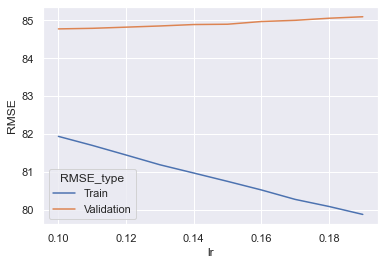

Learning rate set to 0.103531
0:	learn: 0.8837543	total: 15.2ms	remaining: 15.2s
1:	learn: 0.8811850	total: 26.6ms	remaining: 13.2s
2:	learn: 0.8790640	total: 37.3ms	remaining: 12.4s
3:	learn: 0.8771744	total: 48.3ms	remaining: 12s
4:	learn: 0.8755465	total: 58.1ms	remaining: 11.6s
5:	learn: 0.8741538	total: 69.2ms	remaining: 11.5s
6:	learn: 0.8728777	total: 79.6ms	remaining: 11.3s
7:	learn: 0.8718192	total: 90.3ms	remaining: 11.2s
8:	learn: 0.8708073	total: 102ms	remaining: 11.2s
9:	learn: 0.8698793	total: 112ms	remaining: 11.1s
10:	learn: 0.8691131	total: 128ms	remaining: 11.5s
11:	learn: 0.8683353	total: 142ms	remaining: 11.7s
12:	learn: 0.8676215	total: 154ms	remaining: 11.7s
13:	learn: 0.8669842	total: 165ms	remaining: 11.6s
14:	learn: 0.8663626	total: 176ms	remaining: 11.5s
15:	learn: 0.8657224	total: 186ms	remaining: 11.5s
16:	learn: 0.8651986	total: 197ms	remaining: 11.4s
17:	learn: 0.8647262	total: 208ms	remaining: 11.3s
18:	learn: 0.8642452	total: 218ms	remaining: 11.3s
19:	l

166:	learn: 0.8460567	total: 1.93s	remaining: 9.64s
167:	learn: 0.8460062	total: 1.95s	remaining: 9.64s
168:	learn: 0.8459597	total: 1.96s	remaining: 9.64s
169:	learn: 0.8458985	total: 1.97s	remaining: 9.62s
170:	learn: 0.8458441	total: 1.98s	remaining: 9.61s
171:	learn: 0.8457840	total: 1.99s	remaining: 9.59s
172:	learn: 0.8457289	total: 2s	remaining: 9.57s
173:	learn: 0.8456779	total: 2.01s	remaining: 9.55s
174:	learn: 0.8456154	total: 2.02s	remaining: 9.53s
175:	learn: 0.8455708	total: 2.03s	remaining: 9.51s
176:	learn: 0.8455158	total: 2.04s	remaining: 9.5s
177:	learn: 0.8454681	total: 2.05s	remaining: 9.48s
178:	learn: 0.8454051	total: 2.06s	remaining: 9.46s
179:	learn: 0.8453527	total: 2.07s	remaining: 9.44s
180:	learn: 0.8452946	total: 2.08s	remaining: 9.43s
181:	learn: 0.8452385	total: 2.09s	remaining: 9.41s
182:	learn: 0.8451761	total: 2.1s	remaining: 9.4s
183:	learn: 0.8451281	total: 2.12s	remaining: 9.38s
184:	learn: 0.8450707	total: 2.13s	remaining: 9.37s
185:	learn: 0.8450

327:	learn: 0.8388736	total: 3.75s	remaining: 7.68s
328:	learn: 0.8388336	total: 3.76s	remaining: 7.68s
329:	learn: 0.8387930	total: 3.77s	remaining: 7.66s
330:	learn: 0.8387573	total: 3.79s	remaining: 7.65s
331:	learn: 0.8387224	total: 3.8s	remaining: 7.64s
332:	learn: 0.8386828	total: 3.81s	remaining: 7.63s
333:	learn: 0.8386545	total: 3.82s	remaining: 7.62s
334:	learn: 0.8386085	total: 3.83s	remaining: 7.61s
335:	learn: 0.8385722	total: 3.84s	remaining: 7.6s
336:	learn: 0.8385325	total: 3.85s	remaining: 7.58s
337:	learn: 0.8385039	total: 3.86s	remaining: 7.57s
338:	learn: 0.8384720	total: 3.87s	remaining: 7.55s
339:	learn: 0.8384345	total: 3.88s	remaining: 7.54s
340:	learn: 0.8383995	total: 3.89s	remaining: 7.52s
341:	learn: 0.8383661	total: 3.9s	remaining: 7.51s
342:	learn: 0.8383281	total: 3.91s	remaining: 7.5s
343:	learn: 0.8382840	total: 3.93s	remaining: 7.49s
344:	learn: 0.8382492	total: 3.94s	remaining: 7.47s
345:	learn: 0.8382083	total: 3.95s	remaining: 7.46s
346:	learn: 0.83

495:	learn: 0.8331576	total: 5.77s	remaining: 5.87s
496:	learn: 0.8331180	total: 5.79s	remaining: 5.86s
497:	learn: 0.8330805	total: 5.8s	remaining: 5.84s
498:	learn: 0.8330485	total: 5.81s	remaining: 5.83s
499:	learn: 0.8330165	total: 5.82s	remaining: 5.82s
500:	learn: 0.8329832	total: 5.83s	remaining: 5.81s
501:	learn: 0.8329540	total: 5.84s	remaining: 5.79s
502:	learn: 0.8329164	total: 5.85s	remaining: 5.78s
503:	learn: 0.8328985	total: 5.86s	remaining: 5.77s
504:	learn: 0.8328680	total: 5.88s	remaining: 5.76s
505:	learn: 0.8328319	total: 5.89s	remaining: 5.75s
506:	learn: 0.8327926	total: 5.9s	remaining: 5.74s
507:	learn: 0.8327593	total: 5.91s	remaining: 5.72s
508:	learn: 0.8327250	total: 5.92s	remaining: 5.71s
509:	learn: 0.8326942	total: 5.93s	remaining: 5.7s
510:	learn: 0.8326666	total: 5.94s	remaining: 5.69s
511:	learn: 0.8326425	total: 5.95s	remaining: 5.67s
512:	learn: 0.8325997	total: 5.96s	remaining: 5.66s
513:	learn: 0.8325683	total: 5.97s	remaining: 5.65s
514:	learn: 0.8

669:	learn: 0.8278191	total: 7.81s	remaining: 3.85s
670:	learn: 0.8277877	total: 7.83s	remaining: 3.84s
671:	learn: 0.8277603	total: 7.84s	remaining: 3.83s
672:	learn: 0.8277275	total: 7.85s	remaining: 3.81s
673:	learn: 0.8277051	total: 7.86s	remaining: 3.8s
674:	learn: 0.8276693	total: 7.88s	remaining: 3.79s
675:	learn: 0.8276362	total: 7.88s	remaining: 3.78s
676:	learn: 0.8276131	total: 7.89s	remaining: 3.77s
677:	learn: 0.8275892	total: 7.91s	remaining: 3.75s
678:	learn: 0.8275564	total: 7.92s	remaining: 3.74s
679:	learn: 0.8275332	total: 7.93s	remaining: 3.73s
680:	learn: 0.8275096	total: 7.94s	remaining: 3.72s
681:	learn: 0.8274811	total: 7.96s	remaining: 3.71s
682:	learn: 0.8274483	total: 7.97s	remaining: 3.7s
683:	learn: 0.8274125	total: 7.98s	remaining: 3.69s
684:	learn: 0.8273908	total: 8s	remaining: 3.68s
685:	learn: 0.8273570	total: 8.01s	remaining: 3.67s
686:	learn: 0.8273309	total: 8.03s	remaining: 3.66s
687:	learn: 0.8273009	total: 8.04s	remaining: 3.65s
688:	learn: 0.827

839:	learn: 0.8229716	total: 9.85s	remaining: 1.88s
840:	learn: 0.8229540	total: 9.86s	remaining: 1.86s
841:	learn: 0.8229252	total: 9.87s	remaining: 1.85s
842:	learn: 0.8228955	total: 9.88s	remaining: 1.84s
843:	learn: 0.8228531	total: 9.89s	remaining: 1.83s
844:	learn: 0.8228236	total: 9.9s	remaining: 1.82s
845:	learn: 0.8227982	total: 9.91s	remaining: 1.8s
846:	learn: 0.8227672	total: 9.92s	remaining: 1.79s
847:	learn: 0.8227357	total: 9.93s	remaining: 1.78s
848:	learn: 0.8227100	total: 9.94s	remaining: 1.77s
849:	learn: 0.8226833	total: 9.95s	remaining: 1.76s
850:	learn: 0.8226482	total: 9.96s	remaining: 1.74s
851:	learn: 0.8226186	total: 9.97s	remaining: 1.73s
852:	learn: 0.8225873	total: 9.98s	remaining: 1.72s
853:	learn: 0.8225620	total: 9.99s	remaining: 1.71s
854:	learn: 0.8225245	total: 10s	remaining: 1.7s
855:	learn: 0.8224997	total: 10s	remaining: 1.68s
856:	learn: 0.8224697	total: 10s	remaining: 1.67s
857:	learn: 0.8224453	total: 10s	remaining: 1.66s
858:	learn: 0.8224088	t

MSE%: 71.85650305984794
MAE%: 70.95698506501843
R2%: 8.230931558210475
RMSE%: 84.76821518697201
